TSL

20年
20-40
40-60
60-80
北半球积雪陆地

过往 皆为序章  所以 要更新下数据  所谓的   更新就是设置为阈值为0 了 因为 那个夏季不太符合表现  其他的也就算了吧   
这是老版本的 吗

对于SCA 重新弄考量

最大的SCA的月的变化趋势 最小的 平均的
以及 哪个季节的的面积最大  以及趋势
9933万平方千米 北半球  可以计算一个百分数 来

In [1]:
# https://blog.csdn.net/u012111465/article/details/82016992?utm_medium=distribute.pc_relevant.none-task-blog-baidujs_title-3&spm=1001.2101.3001.4242

# Z的绝对值在大于等于1.28、1、64和2.32时，分别表示通过了信度90%，95%，99%的显著性检验。

# Mann-Kendall突变点检测
# 数据序列y
# 结果序列UF，UB
#--------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


def Kendall_change_point_detection(inputdata):
    inputdata = np.array(inputdata)
    n=inputdata.shape[0]
    # 正序列计算---------------------------------
    # 定义累计量序列Sk，初始值=0
    Sk             = [0]
    # 定义统计量UFk，初始值 =0
    UFk            = [0]
    # 定义Sk序列元素s，初始值 =0
    s              =  0
    Exp_value      = [0]
    Var_value      = [0]
    # i从1开始，因为根据统计量UFk公式，i=0时，Sk(0)、E(0)、Var(0)均为0  就是这里   是从1 开始 的
    # 此时UFk无意义，因此公式中，令UFk(0)=0
    for i in range(1,n):
        for j in range(i):
            if inputdata[i] > inputdata[j]:
                s = s+1
            else:
                s = s+0
        Sk.append(s)
        Exp_value.append((i+1)*(i+2)/4 ) 
        #Exp_value.append((i+1)*i/4 )                     # Sk[i]的均值
        Var_value.append((i+1)*i*(2*(i+1)+5)/72 )            # Sk[i]的方差   这个和matlab  的差别就是 i从0 还是i从1开始
        UFk.append((Sk[i]-Exp_value[i])/np.sqrt(Var_value[i]))
    # ------------------------------正序列计算
    # 逆序列计算---------------------------------
    # 定义逆序累计量序列Sk2，长度与inputdata一致，初始值=0
    Sk2             = [0]
    # 定义逆序统计量UBk，长度与inputdata一致，初始值=0
    UBk             = [0]
    UBk2            = [0]
    # s归0
    s2              =  0
    Exp_value2      = [0]
    Var_value2      = [0]
    # 按时间序列逆转样本y
    inputdataT = list(reversed(inputdata))
    # i从2开始，因为根据统计量UBk公式，i=1时，Sk2(1)、E(1)、Var(1)均为0
    # 此时UBk无意义，因此公式中，令UBk(1)=0
    for i in range(1,n):
        for j in range(i):
            if inputdataT[i] > inputdataT[j]:
                s2 = s2+1
            else:
                s2 = s2+0
        Sk2.append(s2)
        #Exp_value.append((i+1)*i/4 )   
        Exp_value2.append((i+1)*(i+2)/4 )                     # Sk[i]的均值
        Var_value2.append((i+1)*i*(2*(i+1)+5)/72 )            # Sk[i]的方差
        UBk.append((Sk2[i]-Exp_value2[i])/np.sqrt(Var_value2[i]))
        
        UBk2.append(-UBk[i])
    # 由于对逆序序列的累计量Sk2的构建中，依然用的是累加法，即后者大于前者时s加1，
    # 则s的大小表征了一种上升的趋势的大小，而序列逆序以后，应当表现出与原序列相反
    # 的趋势表现，因此，用累加法统计Sk2序列，统计量公式(S(i)-E(i))/sqrt(Var(i))
    #也不应改变，但统计量UBk应取相反数以表征正确的逆序序列的趋势
    #  UBk(i)=0-(Sk2(i)-E)/sqrt(Var)
    # ------------------------------逆序列计算
    # 此时上一步的到UBk表现的是逆序列在逆序时间上的趋势统计量
    # 与UFk做图寻找突变点时，2条曲线应具有同样的时间轴，因此
    # 再按时间序列逆转结果统计量UBk，得到时间正序的UBkT，
    UBkT = list(reversed(UBk2))
    diff = np.array(UFk) - np.array(UBkT)
    K    = list()
    # 找出交叉点
    for k in range(1,n):
        if diff[k-1]*diff[k]<0:
            K.append(k)
    # 做突变检测图时，使用UFk和UBkT
    plt.figure(figsize=(10,5))
    plt.title('MK trend')
    plt.plot(range(1,n+1) ,UFk  ,label='UFk') # UFk
    plt.plot(range(1,n+1) ,UBkT ,label='UBk') # UBk
    plt.ylabel('UFk-UBk')
    x_lim = plt.xlim()
    plt.plot(x_lim,[-1.96,-1.96],'m--',color='r')    #   双边检测是1.96  单边检测 1.64  0.05  95% 
    plt.plot(x_lim,[  0  ,  0  ],'m--',color='g')
    plt.plot(x_lim,[+1.96,+1.96],'m--',color='r')
    plt.legend(loc=2) # 图例
    plt.show()
    return K



In [2]:
def Pettitt_change_point_detection(inputdata):
    inputdata = np.array(inputdata)
    n   = inputdata.shape[0]
    k = range(n)
    inputdataT = pd.Series(inputdata)
    r = inputdataT.rank()
    Uk = [2*np.sum(r[0:x])-x*(n + 1) for x in k]
    Uka = list(np.abs(Uk))
    U = np.max(Uka)
    K = Uka.index(U)
    pvalue         = 2 * np.exp((-6 * (U**2))/(n**3 + n**2))
    if pvalue <= 0.05:
        change_point_desc = '显著'
    else:
        change_point_desc = '不显著'
    Pettitt_result = {'突变点位置':K,'突变程度':change_point_desc}
    return K ,Pettitt_result

def Buishand_U_change_point_detection(inputdata):
    inputdata = np.array(inputdata)
    inputdata_mean = np.mean(inputdata)
    n  = inputdata.shape[0]
    k = range(n)
    Sk = [np.sum(inputdata[0:x+1] - inputdata_mean) for x in k]
    sigma = np.sqrt(np.sum((inputdata-np.mean(inputdata))**2)/(n-1))
    U = np.sum((Sk[0:(n - 2)]/sigma)**2)/(n * (n + 1))
    Ska = np.abs(Sk)
    S = np.max(Ska)
    K = list(Ska).index(S) + 1
    Skk = (Sk/sigma)
    return K

def SNHT_change_point_detection(inputdata):
    inputdata = np.array(inputdata)
    inputdata_mean = np.mean(inputdata)
    n  = inputdata.shape[0]
    k = range(1,n)
    sigma = np.sqrt(np.sum((inputdata-np.mean(inputdata))**2)/(n-1))
    Tk = [x*(np.sum((inputdata[0:x]-inputdata_mean)/sigma)/x)**2 + (n-x)*(np.sum((inputdata[x:n]-inputdata_mean)/sigma)/(n-x))**2 for x in k]
    T = np.max(Tk)
    K = list(Tk).index(T) + 1
    return K



# 最新的  更新了阈值后的 7.31


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta
import datetime
import time
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import linear_model

import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签 
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline


#df=pd.read_excel(r'D:\weather_forecast\wind.xlsx',index_col=u'YM')

df=pd.read_excel('E:/NSCA/sca_new.xls')    # header =0  是去掉表头的 
dfs=pd.read_excel('E:/NSCA/sca_s.xls')  

# df=pd.read_excel('E:/SCA/SCAc.csv', header=0,index_col=u'DATE')    # header =0  是去掉表头的 
# df1=pd.read_excel('E:/SCA/SCA_20_40c.csv', header=0,index_col=u'DATE')    # header =0  是去掉表头的 
# df2=pd.read_excel('E:/SCA/SCA_40_60c.csv', header=0,index_col=u'DATE')    # header =0  是去掉表头的 
# df3=pd.read_excel('E:/SCA/SCA_60_80c.csv', header=0,index_col=u'DATE')    # header =0  是去掉表头的 

df  

,month,date,SCA_NA,SCA_EA,SCA_NH,SCA_20_40,SCA_40_60,SCA_60_80,SCA_20_80,year
0,10,2000-10-01T00:00:00,1.340000e+07,1.250000e+07,2.590000e+07,3.586749e+05,4.099486e+06,2.100000e+07,2.545816e+07,2000
1,11,2000-11-01T00:00:00,1.270000e+07,2.000000e+07,3.270000e+07,8.283260e+05,1.420000e+07,1.790000e+07,3.292833e+07,2000
2,12,2000-12-01T00:00:00,9.846527e+06,1.700000e+07,2.684653e+07,1.564062e+06,2.040000e+07,4.949984e+06,2.691405e+07,2000
3,1,2001-01-01T00:00:00,1.370000e+07,2.390000e+07,3.760000e+07,2.171094e+06,2.200000e+07,1.370000e+07,3.787109e+07,2001
4,2,2001-02-01T00:00:00,1.890000e+07,2.920000e+07,4.810000e+07,1.608728e+06,2.180000e+07,2.510000e+07,4.850873e+07,2001
...,...,...,...,...,...,...,...,...,...,...
235,5,2020-05-01T00:00:00,1.720000e+07,1.290000e+07,3.010000e+07,6.616742e+05,4.229806e+06,2.400000e+07,2.889148e+07,2020
236,6,2020-06-01T00:00:00,9.982544e+06,2.115347e+06,1.209789e+07,3.234918e+05,7.435089e+05,9.874342e+06,1.094134e+07,2020
237,7,2020-07-01T00:00:00,6.540114e+06,9.108579e+05,7.450972e+06,1.796326e+05,3.173227e+05,5.934531e+06,6.431487e+06,2020
238,8,2020-08-01T00:00:00,6.258864e+06,8.844283e+05,7.143292e+06,1.255955e+05,3.201666e+05,5.664120e+06,6.109882e+06,2020


In [4]:
dfs # 春夏秋冬的

,year1,NA1,EA1,NH1,year2,NA2,EA2,NH2,year3,NA3,EA3,NH3,year4,NA4,EA4,NH4
0,2001,59100000,63000000,122100000,2001,2.548062e+07,6.431581e+06,3.191220e+07,2001.0,3.055980e+07,3.618080e+07,6.674061e+07,2000,4.244653e+07,70100000,1.125465e+08
1,2002,59600000,62400000,122000000,2002,2.347747e+07,5.105084e+06,2.858256e+07,2002.0,3.263628e+07,3.981642e+07,7.245270e+07,2001,3.854757e+07,69300000,1.078476e+08
2,2003,57000000,66900000,123900000,2003,2.336334e+07,5.494395e+06,2.885773e+07,2003.0,3.086929e+07,3.256969e+07,6.343898e+07,2002,3.814980e+07,75000000,1.131498e+08
3,2004,58700000,66000000,124700000,2004,2.385518e+07,6.454525e+06,3.030970e+07,2004.0,3.245107e+07,3.585385e+07,6.830492e+07,2003,4.150611e+07,69700000,1.112061e+08
4,2005,57000000,65500000,122500000,2005,2.297294e+07,5.392492e+06,2.836543e+07,2005.0,3.130437e+07,3.121215e+07,6.251652e+07,2004,3.948399e+07,73500000,1.129840e+08
5,2006,57700000,66300000,124000000,2006,2.266570e+07,5.326280e+06,2.799198e+07,2006.0,3.062364e+07,3.627591e+07,6.689955e+07,2005,3.867876e+07,72700000,1.113788e+08
6,2007,57700000,62900000,120600000,2007,2.345542e+07,5.662700e+06,2.911812e+07,2007.0,3.159998e+07,3.241034e+07,6.401032e+07,2006,3.985148e+07,66500000,1.063515e+08
7,2008,59500000,60600000,120100000,2008,2.268913e+07,6.366917e+06,2.905604e+07,2008.0,3.218615e+07,3.316537e+07,6.535152e+07,2007,4.200000e+07,70100000,1.121000e+08
8,2009,60300000,63200000,123500000,2009,2.443973e+07,5.659260e+06,3.009899e+07,2009.0,3.078678e+07,3.326349e+07,6.405027e+07,2008,4.125492e+07,69200000,1.104549e+08
9,2010,54600000,64500000,119100000,2010,2.251906e+07,5.664711e+06,2.818377e+07,2010.0,3.003591e+07,3.320966e+07,6.324557e+07,2009,4.277904e+07,73200000,1.159790e+08



累加 按照月份  求出最大的值的月份
然后分出按照的季度
12 1 2 

3 4 5 春季是明显的负趋势

6 7 8

9 10 11

In [5]:
# 111111这是12月的平均值啊  每个月的趋势 是整个北半球的
m01=df.loc[df['month'] == 1, 'SCA_NH'].sum()/20
m02=df.loc[df['month'] == 2, 'SCA_NH'].sum()/20
m03=df.loc[df['month'] == 3, 'SCA_NH'].sum()/20
m04=df.loc[df['month'] == 4, 'SCA_NH'].sum()/20
m05=df.loc[df['month'] == 5, 'SCA_NH'].sum()/20
m06=df.loc[df['month'] == 6, 'SCA_NH'].sum()/20
m07=df.loc[df['month'] == 7, 'SCA_NH'].sum()/20
m08=df.loc[df['month'] == 8, 'SCA_NH'].sum()/20
m09=df.loc[df['month'] == 9, 'SCA_NH'].sum()/20
m10=df.loc[df['month'] == 10, 'SCA_NH'].sum()/20
m11=df.loc[df['month'] == 11, 'SCA_NH'].sum()/20
m12=df.loc[df['month'] == 12, 'SCA_NH'].sum()/20

print('求出最大最小月份')
print('1',m01)
print('2',m02)
print('3',m03)
print('5',m05)
print('6',m06)
print('7',m07)
print('8',m08)
print('9',m09)
print('10',m10)
print('11',m11)
print('12',m12)

month_avg=[m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12]
print(month_avg)
# 最大为3  最小为8

求出最大最小月份
1 37245000.0
2 47605000.0
3 48480000.0
5 30075000.0
6 13525538.14075
7 7787663.38724
8 7344049.94767
9 10673029.233550001
10 25095000.0
11 30320432.32855
12 25609952.469449997
[37245000.0, 47605000.0, 48480000.0, 42795000.0, 30075000.0, 13525538.14075, 7787663.38724, 7344049.94767, 10673029.233550001, 25095000.0, 30320432.32855, 25609952.469449997]


In [6]:
# 111111-----111111  计算每个地区每个月的趋势   用来制作柱状图
d1=df.loc[df['month'] == 11,]
d1


,month,date,SCA_NA,SCA_EA,SCA_NH,SCA_20_40,SCA_40_60,SCA_60_80,SCA_20_80,year
1,11,2000-11-01T00:00:00,1.270000e+07,20000000.0,3.270000e+07,8.283260e+05,1.420000e+07,17900000.0,3.292833e+07,2000
13,11,2001-11-01T00:00:00,1.050000e+07,18100000.0,2.860000e+07,6.841234e+05,9.923855e+06,18200000.0,2.880798e+07,2001
25,11,2002-11-01T00:00:00,1.140000e+07,20000000.0,3.140000e+07,7.782420e+05,1.240000e+07,18300000.0,3.147824e+07,2002
37,11,2003-11-01T00:00:00,1.220000e+07,18700000.0,3.090000e+07,7.163530e+05,1.290000e+07,17400000.0,3.101635e+07,2003
49,11,2004-11-01T00:00:00,1.120000e+07,18800000.0,3.000000e+07,9.656941e+05,1.140000e+07,17800000.0,3.016569e+07,2004
61,11,2005-11-01T00:00:00,1.100000e+07,17400000.0,2.840000e+07,7.924164e+05,1.070000e+07,17200000.0,2.869242e+07,2005
73,11,2006-11-01T00:00:00,1.160000e+07,19900000.0,3.150000e+07,9.183064e+05,1.200000e+07,18800000.0,3.171831e+07,2006
85,11,2007-11-01T00:00:00,1.140000e+07,18600000.0,3.000000e+07,5.354292e+05,1.180000e+07,17800000.0,3.013543e+07,2007
97,11,2008-11-01T00:00:00,1.140000e+07,18100000.0,2.950000e+07,9.223186e+05,1.080000e+07,18000000.0,2.972232e+07,2008
109,11,2009-11-01T00:00:00,1.030000e+07,19100000.0,2.940000e+07,1.101865e+06,1.120000e+07,17400000.0,2.970187e+07,2009


In [7]:
# regr = linear_model.LinearRegression()  
# # 拟合 
# regr.fit(d1['year'].values.reshape(-1, 1), d1['NH']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# # 不难得到直线的斜率、截距 
# a, b = regr.coef_, regr.intercept_ 
# print(a)
# print(b)
# plt.scatter(d1['year'], d1['NH'], color='blue')  
# # 2.拟合的直线 
# plt.plot(d1['year'], regr.predict(d1['year'].values.reshape(-1,1)), color='red', linewidth=4) 
# plt.show()


每月的趋势 三个地区的  主要看NH

3月最大值  8月最小值 
最大 最小值均呈现下降
3月 

NH
1 -57969.92481203
2 -99323.30827068
3 -63308.27067669
4 -58872.18045113
5 -72556.39097744
6 -103613.34659474
7 1179.70273639
8 -1187.5368818
9 -45073.44224887
10 -53458.64661654
11 8505.56798722
12 -70819.82764286

NA
1 5488.72180451
2 -18270.67669173
3 6992.48120301
4 12406.01503759
5 -30451.12781955
6 -57638.2707797
7 1690.1015391
8 -1187.5368818
9 21275.62037519
10 -16691.72932331
11 20084.51535564
12 3165.13476316

EA
1 -63458.64661654
2 -81052.63157895
3 -70300.7518797
4 -71278.19548872
5 -42105.26315789
6 -45975.07581504
7 -510.39880271
8 -954.68915173
9 -66349.06262406
10 -36766.91729323
11 -11578.94736842
12 -73984.96240602

In [8]:
df

# max3 = pd.DataFrame()
max3=df.loc[df['month'] == 3]
min8=df.loc[df['month'] == 8]
max3
max3['SCA_NH']/=1000000
min8['SCA_NH']/=1000000
max3

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,month,date,SCA_NA,SCA_EA,SCA_NH,SCA_20_40,SCA_40_60,SCA_60_80,SCA_20_80,year
5,3,2001-03-01T00:00:00,21800000.0,27600000.0,49.4,1.032472e+06,18600000.0,28800000.0,4.843247e+07,2001
17,3,2002-03-01T00:00:00,21000000.0,25100000.0,46.1,1.286188e+06,15800000.0,28000000.0,4.508619e+07,2002
29,3,2003-03-01T00:00:00,20900000.0,28900000.0,49.8,1.492464e+06,19100000.0,28100000.0,4.869246e+07,2003
41,3,2004-03-01T00:00:00,20900000.0,27200000.0,48.1,9.209982e+05,17800000.0,28400000.0,4.712100e+07,2004
53,3,2005-03-01T00:00:00,21200000.0,28400000.0,49.6,1.435514e+06,18800000.0,28400000.0,4.863551e+07,2005
65,3,2006-03-01T00:00:00,21900000.0,28000000.0,49.9,1.284066e+06,18900000.0,28600000.0,4.878407e+07,2006
77,3,2007-03-01T00:00:00,21100000.0,27200000.0,48.3,1.393364e+06,17100000.0,28700000.0,4.719336e+07,2007
89,3,2008-03-01T00:00:00,21600000.0,24600000.0,46.2,1.167911e+06,15400000.0,28600000.0,4.516791e+07,2008
101,3,2009-03-01T00:00:00,21700000.0,27600000.0,49.3,1.176576e+06,18600000.0,28500000.0,4.827658e+07,2009
113,3,2010-03-01T00:00:00,21100000.0,28800000.0,49.9,1.146496e+06,19100000.0,28500000.0,4.874650e+07,2010


In [9]:
import scipy.stats as stats
from sklearn.metrics import mean_squared_error,r2_score 
r,p = stats.pearsonr(max3['year'],max3['SCA_NH'])  # 相关系数和P值
print('r',r)
print('p',p)
print('r2',0.06)
r1,p1 = stats.pearsonr(max3['year'],min8['SCA_NH'])  # 相关系数和P值
print('r1',r1)
print('p1',p1)# 没有显著性
print('r2',0.04)


r -0.23645014625153968
p 0.3155350796734681
r2 0.06
r1 -0.05036821924959259
p1 0.8329787400054732
r2 0.04


x range(0, 20)
a [-0.06330827]
b 175.76127819548864
a1 [-0.00118754]
b1 9.731592848537947


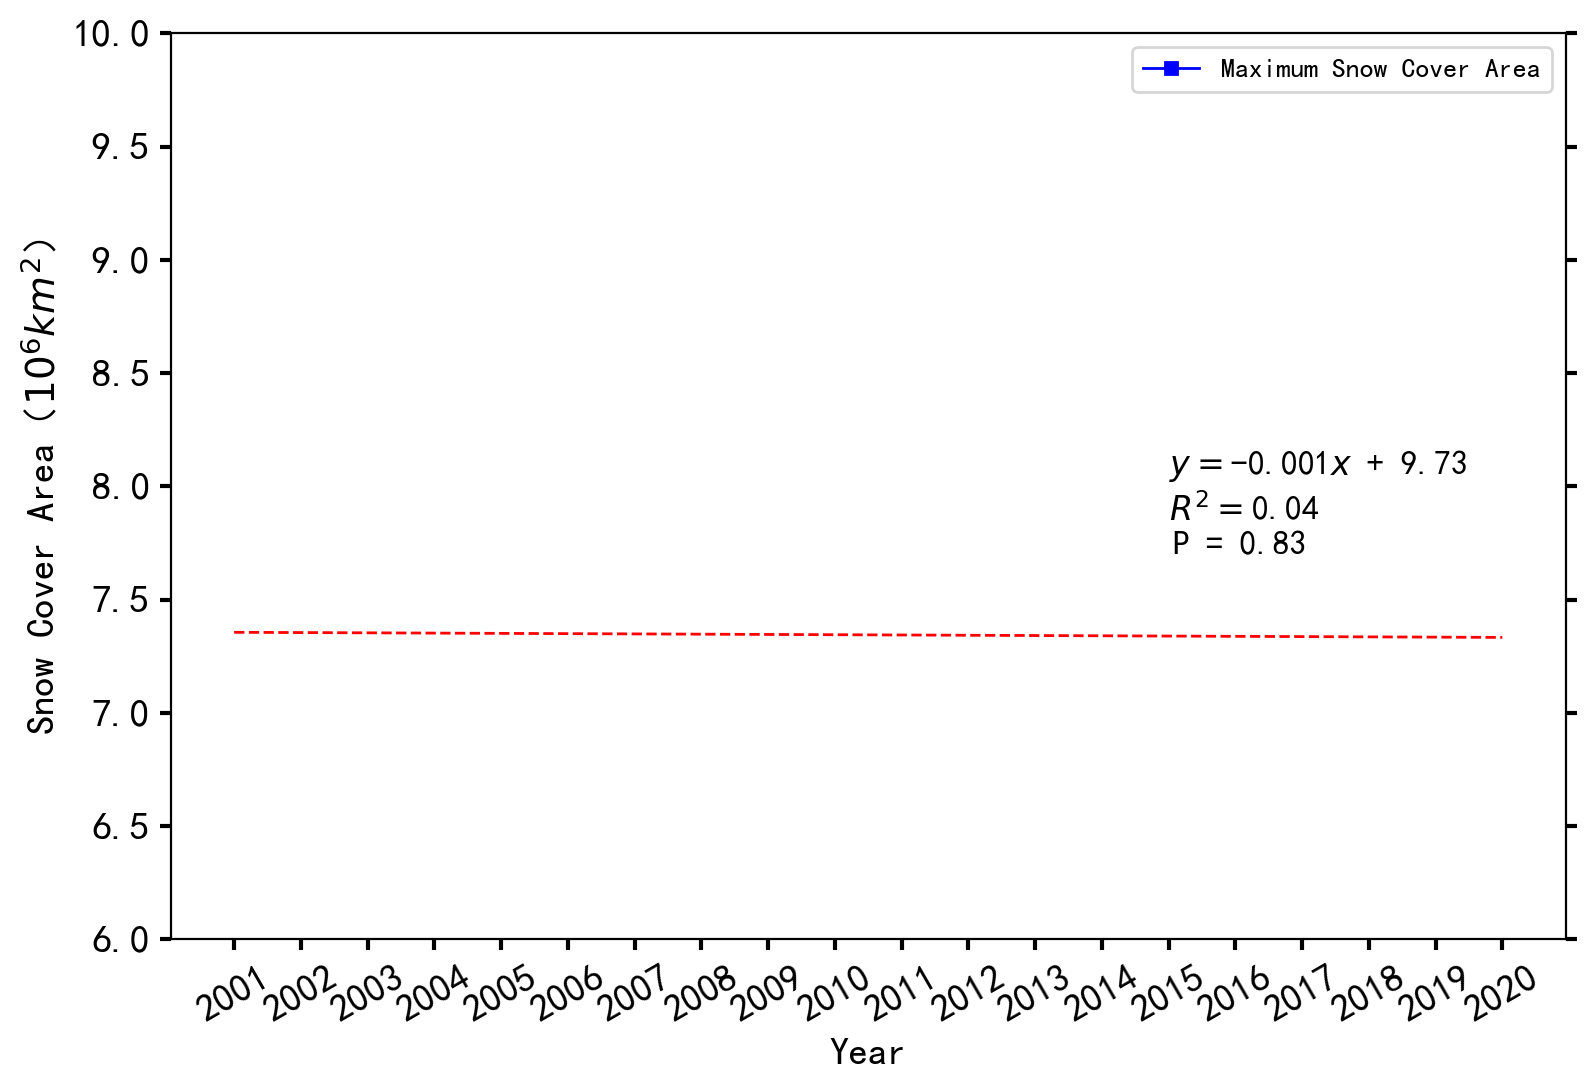

In [10]:
#  折线图   并 做点  最大 46 100 000
fig, ax = plt.subplots(figsize=(9, 6),dpi=200)
# plt.figure(figsize=(9,6),dpi=600)
year = max3['year']
x = range(len(year))
print('x',x)
y = max3['SCA_NH']
y1= min8['SCA_NH']
# plt.plot(x, y, 'ro-')
# plt.plot(x, y1, 'bo-')
#plt.xlim(-1, 11)  # 限定横轴的范围

fontdict = {"size": 12, "color": "k", 'weight': 'bold'}

regr = linear_model.LinearRegression() 
regr.fit(year.values.reshape(-1, 1), y) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
a, b = regr.coef_, regr.intercept_ 
print('a',a)
print('b',b)
regr1 = linear_model.LinearRegression() 
regr1.fit(year.values.reshape(-1, 1), y1) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
a1, b1 = regr1.coef_, regr1.intercept_ 
print('a1',a1)
print('b1',b1)


# ax.set_ylim((30, 70))
# ax.plot(year, regr.predict(year.values.reshape(-1,1)), color='b', linewidth=1,linestyle='--') 
ax.plot(year,y,color='b',linestyle='-',linewidth=1,marker="s",markersize=4, markerfacecolor='b',label=u'Maximum Snow Cover Area')#40-60
# ax.text(2015,56, r'$y=$' + "-0.063" + '$x$' + " + " + "175.76",size=12)
# ax.text(2015,54,r'$R^2=$' + "0.06",size=12) 
# ax.text(2015.06,52.5,'P = ' + "0.31",size=12) 
     


ax.set_ylim((6, 10))
plt.plot(year, regr1.predict(year.values.reshape(-1,1)), color='r', linewidth=1,linestyle='--') 
# plt.plot(year,y1,color='r',linestyle='-',linewidth=1.2,marker="8",markersize=4,markerfacecolor='r',label='Minimum Snow Cover Area')#6.5-8.5

ax.text(2015,8.05, r'$y=$' + "-0.001" + '$x$' + " + " + "9.73",size=12)
ax.text(2015,7.85,r'$R^2=$' + "0.04",size=12) 
ax.text(2015.06,7.7,r'P = ' + "0.83",size=12) 



# ax.spines['bottom'].set_color('k')
# ax.tick_params( direction='out', labelsize=14, width=1.5, length=4)


# plt.ylim(4, 10)  # 限定纵轴的范围  y1

# ticks = ax.set_xticks([2001, 2004, 2008, 2012, 2016,2020])  
# labels = ax.set_xticklabels([2001, 2004, 2008, 2012, 2016,2020], fontsize='6')  

ticks = ax.set_xticks([2001,2002,2003, 2004, 2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])  
labels = ax.set_xticklabels([2001,2002,2003, 2004, 2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],rotation=30, fontsize='small')  

# plt.xticks(x,year)

ax.tick_params(bottom=True,direction='in', labelsize=6, width=1.5, length=4)
ax.tick_params(left=True,direction='out', labelsize=14, width=1.5, length=4)

ax.tick_params(right=True, labelsize=14, width=1.5, length=4)

plt.legend()  # 让图例生效



# plt.xticks(np.arange(20), ('2001', '2002', '2003', '2004', '2005',
#            '2006', '2007', '2008', '2009', '2010',
#             '2011', '2012', '2013', '2014', '2015',
#            '2016', '2017', '2018', '2019', '2020'
#           ))
# plt.subplots_adjust(bottom=0.15)
# ax.set_xlabel(u"年份",fontsize=14) #X轴标签
# ax.set_ylabel('积雪面积（$10^6km^2$）',fontsize=14)
ax.set_xlabel(u"Year",fontsize=14) #X轴标签
ax.set_ylabel('Snow Cover Area（$10^6km^2$）',fontsize=14)
plt.savefig("E:/book/海洋湖沼通报/p图/1.png",format='png')
plt.show()

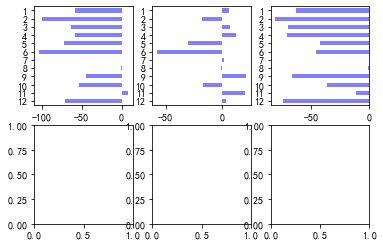

In [11]:
fig, axes = plt.subplots(2,3)
month_rate = {    
    '12': -70.81982,
     '11':8.50556798722,
     '10': -53.458646616,
     '9': -45.07344224887,
     '8': -1.1875368818,
     '7': 1.17970273639,
     '6': -103.61334659474,
     '5': -72.55639097744,
     '4': -58.87218045113,
     '3': -63.30827067669,
     '2': -99.32330827068,
     '1': -57.96992481203
    }
# NA
month_rate_NA= {  
    '12': 3.165,
     '11':20.084,
     '10': -16.69,
     '9': 21.2757,
     '8': -1.187,
     '7': 1.6690,
     '6': -57.638,
     '5': -30.451,
     '4': 12.406,
     '3': 6.992,
     '2': -18.270,
     '1': 5.488
    }
# EA 
month_rate_EA= {  
    '12': -73.98482,
     '11':-11.57850556798722,
     '10': -36.7666458646616,
     '9': -66.34944224887,
     '8': -0.9541875368818,
     '7': -0.51017970273639,
     '6': -45.91334659474,
     '5': -42.155639097744,
     '4': -71.287218045113,
     '3': -70.30827067669,
     '2': -81.032330827068,
     '1': -63.45896992481203
    }
    
# group_data = list(month_rate.values())
# group_names = list(month_rate.keys())

month_rate=pd.Series(month_rate)
month_rate_NA=pd.Series(month_rate_NA)
month_rate_EA=pd.Series(month_rate_EA)
month_rate.plot.barh(ax=axes[0,0], color='b', alpha = 0.5)
month_rate_NA.plot.barh(ax=axes[0,1], color='b', alpha = 0.5)
month_rate_EA.plot.barh(ax=axes[0,2], color='b', alpha = 0.5)
# plt.figure()
plt.show()
#   NH   NA  EA


In [12]:
# 22222计算分季节的每个地区的趋势
dfs1=dfs
dfs1

,year1,NA1,EA1,NH1,year2,NA2,EA2,NH2,year3,NA3,EA3,NH3,year4,NA4,EA4,NH4
0,2001,59100000,63000000,122100000,2001,2.548062e+07,6.431581e+06,3.191220e+07,2001.0,3.055980e+07,3.618080e+07,6.674061e+07,2000,4.244653e+07,70100000,1.125465e+08
1,2002,59600000,62400000,122000000,2002,2.347747e+07,5.105084e+06,2.858256e+07,2002.0,3.263628e+07,3.981642e+07,7.245270e+07,2001,3.854757e+07,69300000,1.078476e+08
2,2003,57000000,66900000,123900000,2003,2.336334e+07,5.494395e+06,2.885773e+07,2003.0,3.086929e+07,3.256969e+07,6.343898e+07,2002,3.814980e+07,75000000,1.131498e+08
3,2004,58700000,66000000,124700000,2004,2.385518e+07,6.454525e+06,3.030970e+07,2004.0,3.245107e+07,3.585385e+07,6.830492e+07,2003,4.150611e+07,69700000,1.112061e+08
4,2005,57000000,65500000,122500000,2005,2.297294e+07,5.392492e+06,2.836543e+07,2005.0,3.130437e+07,3.121215e+07,6.251652e+07,2004,3.948399e+07,73500000,1.129840e+08
5,2006,57700000,66300000,124000000,2006,2.266570e+07,5.326280e+06,2.799198e+07,2006.0,3.062364e+07,3.627591e+07,6.689955e+07,2005,3.867876e+07,72700000,1.113788e+08
6,2007,57700000,62900000,120600000,2007,2.345542e+07,5.662700e+06,2.911812e+07,2007.0,3.159998e+07,3.241034e+07,6.401032e+07,2006,3.985148e+07,66500000,1.063515e+08
7,2008,59500000,60600000,120100000,2008,2.268913e+07,6.366917e+06,2.905604e+07,2008.0,3.218615e+07,3.316537e+07,6.535152e+07,2007,4.200000e+07,70100000,1.121000e+08
8,2009,60300000,63200000,123500000,2009,2.443973e+07,5.659260e+06,3.009899e+07,2009.0,3.078678e+07,3.326349e+07,6.405027e+07,2008,4.125492e+07,69200000,1.104549e+08
9,2010,54600000,64500000,119100000,2010,2.251906e+07,5.664711e+06,2.818377e+07,2010.0,3.003591e+07,3.320966e+07,6.324557e+07,2009,4.277904e+07,73200000,1.159790e+08


In [13]:
# dfs1.drop(index=[19],inplace = True)
# # dfs['NA3']=
# # dfs['NA3']=
# # dfs['NA3']=
# dfs1['year3']
# dfs1['NA3']
# dfs1['NA3']
# dfs1['NA3']

In [14]:
# -251975.88116745  春季
# -75082.29196576
# -63618.03541481
# -281913.17707467  冬季
# 可能是前人的研究与我的所计算的年份不同

# 这个是SCA 最开始的版本1

In [15]:
#  这个是SCA_NA_EA文件夹下的 版本2 不用了
# #春
# NA1 -18280.08807374
# EA1 -234497.55852266
# NH1 -252777.6465964 
# #夏
# NA2 -33900.33707873
# EA2 -38352.42143363
# NH2 -72252.75851237
# #秋
# NA3 46347.36994758
# EA3 -108560.08052533
# NH3 -62212.71057776

# #冬
# NA4 -25389.93416315
# EA4 -253467.20149965
# NH4 -278857.1356628

最新版本3  四个季节的三个地区的趋势出来了 就是没有那个曲线图
#春
NA1  -11052.63157895
EA1  -183684.21052632
NH1  -194736.84210526
#夏
NA2  -56181.01697068
EA2  -47440.16376947
NH2  -103621.18074015
#秋
NA3 66611.12420351
EA3 -95194.66687719
NH3 -28583.54267368

#冬
NA4  -6679.96261053
EA4 -184561.40350877
NH4 -191241.3661193


--------------------------------------------

[-228113.06072556]
568853147.9974704


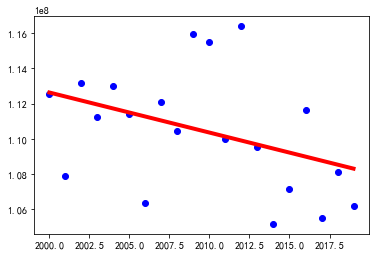

In [16]:
regr = linear_model.LinearRegression()  
# 拟合 
regr.fit(dfs['year4'].values.reshape(-1, 1), dfs1['NH4']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# 不难得到直线的斜率、截距 
a, b = regr.coef_, regr.intercept_ 
print(a)
print(b)
plt.scatter(dfs['year4'], dfs1['NH4'], color='blue')  
# 2.拟合的直线 
plt.plot(dfs['year4'], regr.predict(dfs['year4'].values.reshape(-1,1)), color='red', linewidth=4) 
plt.show()

In [17]:
# 画出四个季节的图来

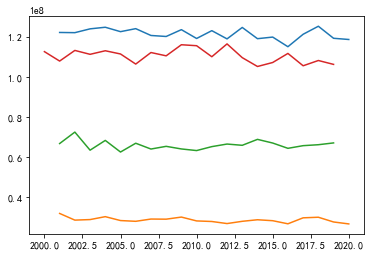

In [18]:

plt.plot(dfs1['year1'], dfs1['NH1']) #1   春
plt.plot(dfs1['year2'], dfs1['NH2'])  #4 夏季
plt.plot(dfs1['year3'], dfs1['NH3'])  # 3 秋
plt.plot(dfs1['year4'], dfs1['NH4'])  # 2 冬

In [19]:
# 找出断点来 MK  春 冬 的  时间年际差异   以及三个地区 分别的 总的地区的 断点啊 

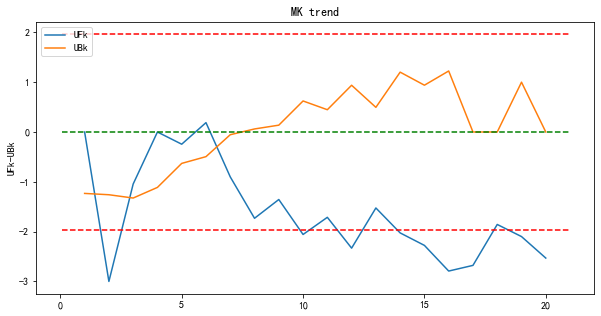

Mann-Kendall: [1, 2, 6]
Pettitt: (9, {'突变点位置': 9, '突变程度': '不显著'})
Buishand U Test: 13
Standard Normal Homogeneity Test (SNHT): 6


In [20]:
# NH  春
print("Mann-Kendall:",Kendall_change_point_detection(dfs1['NH1']))
print("Pettitt:",Pettitt_change_point_detection(dfs1['NH1']))
print("Buishand U Test:",Buishand_U_change_point_detection(dfs1['NH1']))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(dfs1['NH1']))

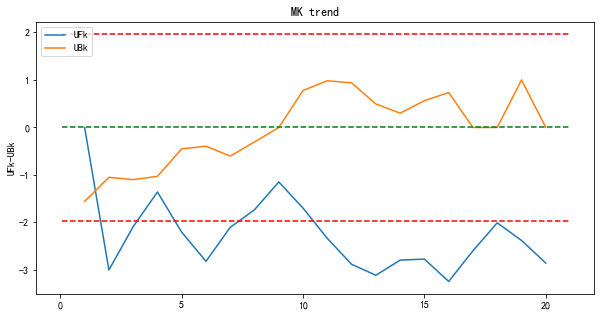

Mann-Kendall: [1]
Pettitt: (9, {'突变点位置': 9, '突变程度': '不显著'})
Buishand U Test: 9
Standard Normal Homogeneity Test (SNHT): 1


In [21]:
# NH  夏
print("Mann-Kendall:",Kendall_change_point_detection(dfs1['NH2']))
print("Pettitt:",Pettitt_change_point_detection(dfs1['NH2']))
print("Buishand U Test:",Buishand_U_change_point_detection(dfs1['NH2']))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(dfs1['NH2']))

In [22]:
# # NH  秋
# print("Mann-Kendall:",Kendall_change_point_detection(dfs1['NH3']))
# print("Pettitt:",Pettitt_change_point_detection(dfs1['NH3']))
# print("Buishand U Test:",Buishand_U_change_point_detection(dfs1['NH3']))
# print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(dfs1['NH3']))

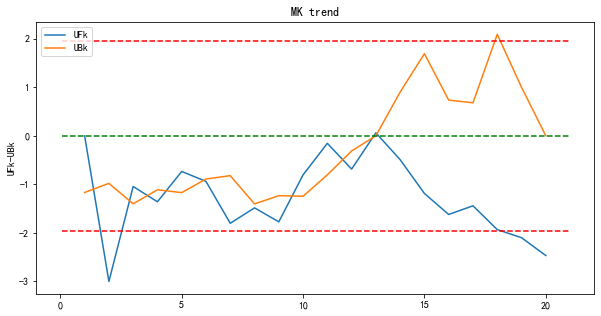

Mann-Kendall: [1, 2, 3, 4, 5, 9, 11, 12, 13]
Pettitt: (13, {'突变点位置': 13, '突变程度': '不显著'})
Buishand U Test: 13
Standard Normal Homogeneity Test (SNHT): 13


In [23]:
# NH  冬
print("Mann-Kendall:",Kendall_change_point_detection(dfs1['NH4']))
print("Pettitt:",Pettitt_change_point_detection(dfs1['NH4']))
print("Buishand U Test:",Buishand_U_change_point_detection(dfs1['NH4']))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(dfs1['NH4']))

In [24]:
# # NH  总
# print("Mann-Kendall:",Kendall_change_point_detection(df['SCA_NH']))
# print("Pettitt:",Pettitt_change_point_detection(df['SCA_NH']))
# print("Buishand U Test:",Buishand_U_change_point_detection(df['SCA_NH']))
# print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(df['SCA_NH']))

In [25]:
# # NA 总
# print("Mann-Kendall:",Kendall_change_point_detection(df['SCA_NA']))
# print("Pettitt:",Pettitt_change_point_detection(df['SCA_NA']))
# print("Buishand U Test:",Buishand_U_change_point_detection(df['SCA_NA']))
# print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(df['SCA_NA']))

In [26]:
# # EA  总
# print("Mann-Kendall:",Kendall_change_point_detection(df['SCA_EA']))
# print("Pettitt:",Pettitt_change_point_detection(df['SCA_EA']))
# print("Buishand U Test:",Buishand_U_change_point_detection(df['SCA_EA']))
# print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(df['SCA_EA']))

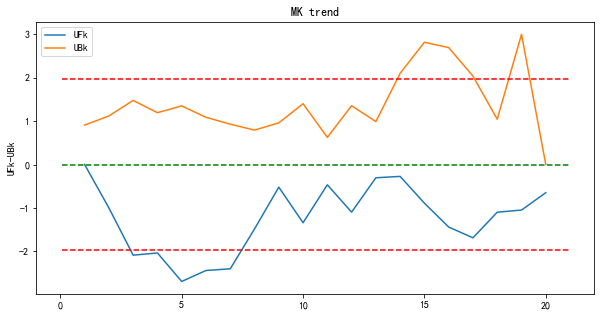

Mann-Kendall: []
Pettitt: (17, {'突变点位置': 17, '突变程度': '不显著'})
Buishand U Test: 14
Standard Normal Homogeneity Test (SNHT): 17


In [27]:
# # NA  春
print("Mann-Kendall:",Kendall_change_point_detection(dfs1['NA1']))
print("Pettitt:",Pettitt_change_point_detection(dfs1['NA1']))
print("Buishand U Test:",Buishand_U_change_point_detection(dfs1['NA1']))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(dfs1['NA1']))

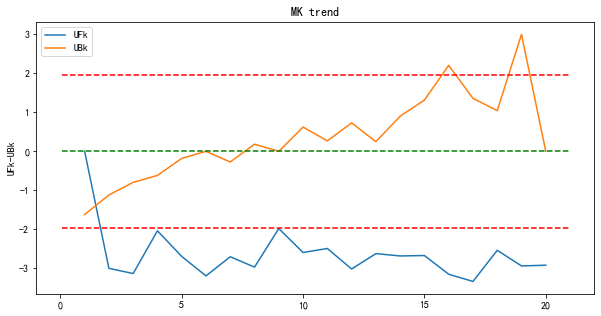

Mann-Kendall: [1]
Pettitt: (9, {'突变点位置': 9, '突变程度': '不显著'})
Buishand U Test: 9
Standard Normal Homogeneity Test (SNHT): 1


In [28]:
# # NA  秋
print("Mann-Kendall:",Kendall_change_point_detection(dfs1['NA2']))
print("Pettitt:",Pettitt_change_point_detection(dfs1['NA2']))
print("Buishand U Test:",Buishand_U_change_point_detection(dfs1['NA2']))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(dfs1['NA2']))

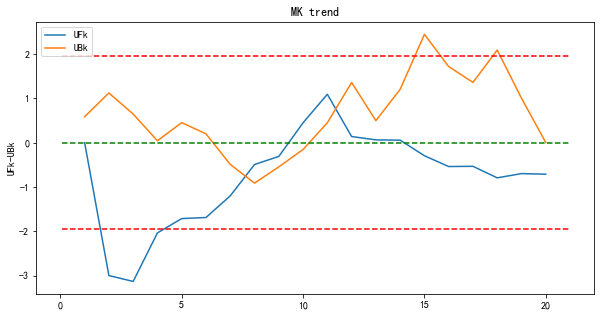

Mann-Kendall: [7, 11]
Pettitt: (11, {'突变点位置': 11, '突变程度': '不显著'})
Buishand U Test: 11
Standard Normal Homogeneity Test (SNHT): 1


In [29]:
# # NA  冬
print("Mann-Kendall:",Kendall_change_point_detection(dfs1['NA4']))
print("Pettitt:",Pettitt_change_point_detection(dfs1['NA4']))
print("Buishand U Test:",Buishand_U_change_point_detection(dfs1['NA4']))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(dfs1['NA4']))

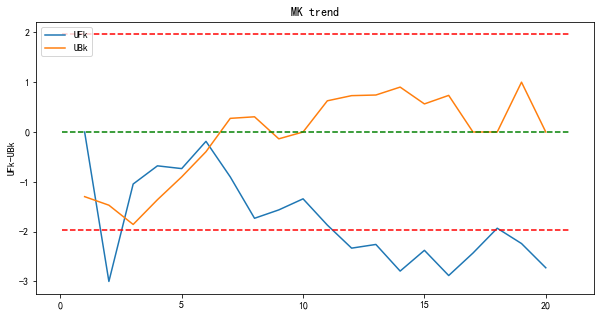

Mann-Kendall: [1, 2, 6]
Pettitt: (6, {'突变点位置': 6, '突变程度': '不显著'})
Buishand U Test: 6
Standard Normal Homogeneity Test (SNHT): 6


In [30]:
# # EA  春
print("Mann-Kendall:",Kendall_change_point_detection(dfs1['EA1']))
print("Pettitt:",Pettitt_change_point_detection(dfs1['EA1']))
print("Buishand U Test:",Buishand_U_change_point_detection(dfs1['EA1']))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(dfs1['EA1']))

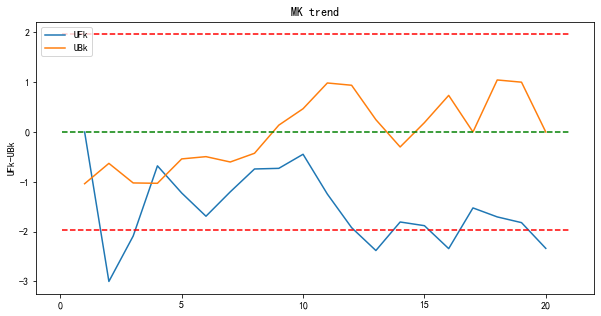

Mann-Kendall: [1, 3, 4]
Pettitt: (10, {'突变点位置': 10, '突变程度': '不显著'})
Buishand U Test: 10
Standard Normal Homogeneity Test (SNHT): 19


In [31]:
# # EA  秋
print("Mann-Kendall:",Kendall_change_point_detection(dfs1['EA2']))
print("Pettitt:",Pettitt_change_point_detection(dfs1['EA2']))
print("Buishand U Test:",Buishand_U_change_point_detection(dfs1['EA2']))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(dfs1['EA2']))

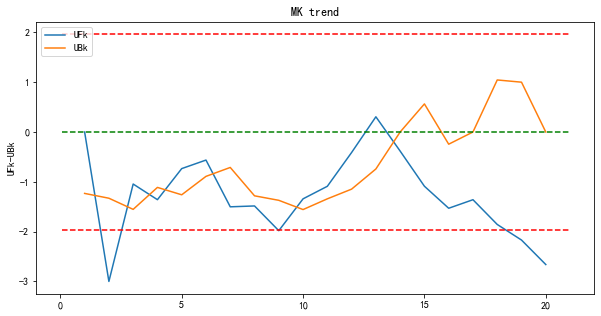

Mann-Kendall: [1, 2, 3, 4, 6, 9, 13]
Pettitt: (13, {'突变点位置': 13, '突变程度': '显著'})
Buishand U Test: 13
Standard Normal Homogeneity Test (SNHT): 13


In [32]:
# # EA  冬
print("Mann-Kendall:",Kendall_change_point_detection(dfs1['EA4']))
print("Pettitt:",Pettitt_change_point_detection(dfs1['EA4']))
print("Buishand U Test:",Buishand_U_change_point_detection(dfs1['EA4']))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(dfs1['EA4']))

In [33]:
#33333 然后是每个地区的SCA的曲线图  这个没用   但是做了这个STL 不同于以前的按照纬度的 这个是按照地区的



In [34]:
# df['SCA'].plot(figsize=(12,8),title="SCA change",fontsize=14)

In [35]:
df

,month,date,SCA_NA,SCA_EA,SCA_NH,SCA_20_40,SCA_40_60,SCA_60_80,SCA_20_80,year
0,10,2000-10-01T00:00:00,1.340000e+07,1.250000e+07,2.590000e+07,3.586749e+05,4.099486e+06,2.100000e+07,2.545816e+07,2000
1,11,2000-11-01T00:00:00,1.270000e+07,2.000000e+07,3.270000e+07,8.283260e+05,1.420000e+07,1.790000e+07,3.292833e+07,2000
2,12,2000-12-01T00:00:00,9.846527e+06,1.700000e+07,2.684653e+07,1.564062e+06,2.040000e+07,4.949984e+06,2.691405e+07,2000
3,1,2001-01-01T00:00:00,1.370000e+07,2.390000e+07,3.760000e+07,2.171094e+06,2.200000e+07,1.370000e+07,3.787109e+07,2001
4,2,2001-02-01T00:00:00,1.890000e+07,2.920000e+07,4.810000e+07,1.608728e+06,2.180000e+07,2.510000e+07,4.850873e+07,2001
...,...,...,...,...,...,...,...,...,...,...
235,5,2020-05-01T00:00:00,1.720000e+07,1.290000e+07,3.010000e+07,6.616742e+05,4.229806e+06,2.400000e+07,2.889148e+07,2020
236,6,2020-06-01T00:00:00,9.982544e+06,2.115347e+06,1.209789e+07,3.234918e+05,7.435089e+05,9.874342e+06,1.094134e+07,2020
237,7,2020-07-01T00:00:00,6.540114e+06,9.108579e+05,7.450972e+06,1.796326e+05,3.173227e+05,5.934531e+06,6.431487e+06,2020
238,8,2020-08-01T00:00:00,6.258864e+06,8.844283e+05,7.143292e+06,1.255955e+05,3.201666e+05,5.664120e+06,6.109882e+06,2020


<Figure size 3600x2400 with 0 Axes>

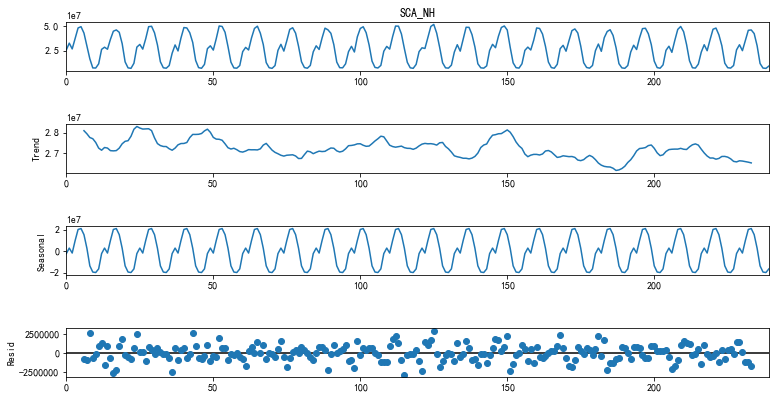

In [36]:
#从2000 10月 到2020 9月
# ax.set_xlabel('时间/年',fontsize=14)
decomposition=seasonal_decompose(df['SCA_NH'],period=12)
fig=plt.figure(dpi=600)


#x= range(1, 21)#x 轴数据
fig=decomposition.plot()
# fig = plt.figure()
# plt.xticks(x,x[::1])
fig.set_size_inches(12,6)


plt.savefig('sca1129.png',dpi = 600)
plt.show()

# 第23    47    118    150   200个月
#  02    04 的7.8月  2010  2013 2017

年际变化STL  mk  也找不出什么节点

<Figure size 432x288 with 0 Axes>

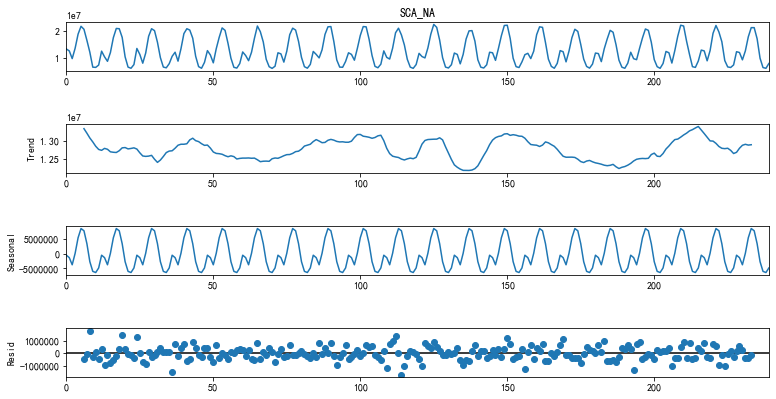

In [37]:
decomposition=seasonal_decompose(df['SCA_NA'],period=12)
fig=plt.figure()
fig=decomposition.plot()
# fig.suptitle('The NA                   ')
fig.set_size_inches(12,6)

<Figure size 432x288 with 0 Axes>

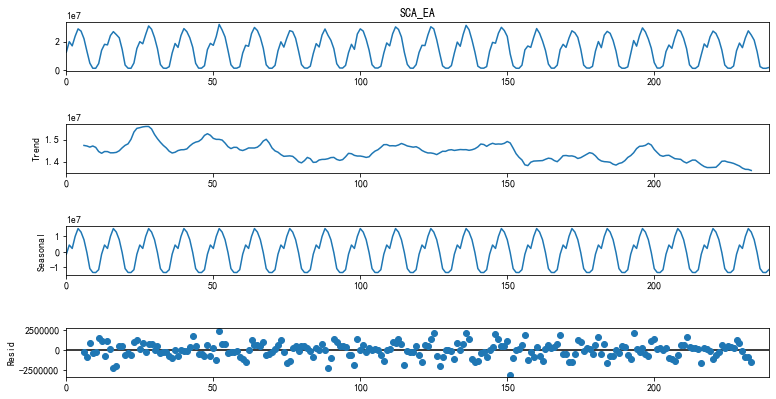

In [38]:
decomposition=seasonal_decompose(df['SCA_EA'],period=12)
fig=plt.figure()
fig=decomposition.plot()
# fig.suptitle('The EA               ')
fig.set_size_inches(12,6)

想看看这个贡献率的效应  这个是非常重要的  就是对比  一个是 这个SCA 的地区效应 一个是SCP 地区效应
可以看到三个地区的曲线 是不一致 的或者说是有先后时间顺序的 


就是做多年的分地区的月平均 这是多年的面积的分地区的?

In [39]:
#444444 然后是地区的贡献率
df

,month,date,SCA_NA,SCA_EA,SCA_NH,SCA_20_40,SCA_40_60,SCA_60_80,SCA_20_80,year
0,10,2000-10-01T00:00:00,1.340000e+07,1.250000e+07,2.590000e+07,3.586749e+05,4.099486e+06,2.100000e+07,2.545816e+07,2000
1,11,2000-11-01T00:00:00,1.270000e+07,2.000000e+07,3.270000e+07,8.283260e+05,1.420000e+07,1.790000e+07,3.292833e+07,2000
2,12,2000-12-01T00:00:00,9.846527e+06,1.700000e+07,2.684653e+07,1.564062e+06,2.040000e+07,4.949984e+06,2.691405e+07,2000
3,1,2001-01-01T00:00:00,1.370000e+07,2.390000e+07,3.760000e+07,2.171094e+06,2.200000e+07,1.370000e+07,3.787109e+07,2001
4,2,2001-02-01T00:00:00,1.890000e+07,2.920000e+07,4.810000e+07,1.608728e+06,2.180000e+07,2.510000e+07,4.850873e+07,2001
...,...,...,...,...,...,...,...,...,...,...
235,5,2020-05-01T00:00:00,1.720000e+07,1.290000e+07,3.010000e+07,6.616742e+05,4.229806e+06,2.400000e+07,2.889148e+07,2020
236,6,2020-06-01T00:00:00,9.982544e+06,2.115347e+06,1.209789e+07,3.234918e+05,7.435089e+05,9.874342e+06,1.094134e+07,2020
237,7,2020-07-01T00:00:00,6.540114e+06,9.108579e+05,7.450972e+06,1.796326e+05,3.173227e+05,5.934531e+06,6.431487e+06,2020
238,8,2020-08-01T00:00:00,6.258864e+06,8.844283e+05,7.143292e+06,1.255955e+05,3.201666e+05,5.664120e+06,6.109882e+06,2020


In [40]:
# 4.1 先是完整序列的相关性
df.corr()

,month,SCA_NA,SCA_EA,SCA_NH,SCA_20_40,SCA_40_60,SCA_60_80,SCA_20_80,year
month,1.000000,-0.629245,-0.505701,-0.571622,-0.488179,-0.383445,-0.519593,-0.558556,-0.056358
SCA_NA,-0.629245,1.000000,0.811703,0.914009,0.483223,0.524775,0.945012,0.897932,0.010684
SCA_EA,-0.505701,0.811703,1.000000,0.978858,0.830597,0.890123,0.716290,0.985720,-0.034045
SCA_NH,-0.571622,0.914009,0.978858,1.000000,0.746156,0.802055,0.828478,0.999136,-0.019906
SCA_20_40,-0.488179,0.483223,0.830597,0.746156,1.000000,0.930123,0.299835,0.763854,-0.033095
SCA_40_60,-0.383445,0.524775,0.890123,0.802055,0.930123,1.000000,0.331371,0.820127,-0.027593
SCA_60_80,-0.519593,0.945012,0.716290,0.828478,0.299835,0.331371,1.000000,0.811391,-0.006288
SCA_20_80,-0.558556,0.897932,0.985720,0.999136,0.763854,0.820127,0.811391,1.000000,-0.021235
year,-0.056358,0.010684,-0.034045,-0.019906,-0.033095,-0.027593,-0.006288,-0.021235,1.000000


MA->NH  0.914009
EA->NH  0.978858


In [41]:
N_H=df

N_H.rename(columns={'SCA_NA':'NA'},inplace=True)
N_H.rename(columns={'SCA_EA':'EA'},inplace=True)
N_H.rename(columns={'SCA_NH':'NH'},inplace=True)
N_H


,month,date,NA,EA,NH,SCA_20_40,SCA_40_60,SCA_60_80,SCA_20_80,year
0,10,2000-10-01T00:00:00,1.340000e+07,1.250000e+07,2.590000e+07,3.586749e+05,4.099486e+06,2.100000e+07,2.545816e+07,2000
1,11,2000-11-01T00:00:00,1.270000e+07,2.000000e+07,3.270000e+07,8.283260e+05,1.420000e+07,1.790000e+07,3.292833e+07,2000
2,12,2000-12-01T00:00:00,9.846527e+06,1.700000e+07,2.684653e+07,1.564062e+06,2.040000e+07,4.949984e+06,2.691405e+07,2000
3,1,2001-01-01T00:00:00,1.370000e+07,2.390000e+07,3.760000e+07,2.171094e+06,2.200000e+07,1.370000e+07,3.787109e+07,2001
4,2,2001-02-01T00:00:00,1.890000e+07,2.920000e+07,4.810000e+07,1.608728e+06,2.180000e+07,2.510000e+07,4.850873e+07,2001
...,...,...,...,...,...,...,...,...,...,...
235,5,2020-05-01T00:00:00,1.720000e+07,1.290000e+07,3.010000e+07,6.616742e+05,4.229806e+06,2.400000e+07,2.889148e+07,2020
236,6,2020-06-01T00:00:00,9.982544e+06,2.115347e+06,1.209789e+07,3.234918e+05,7.435089e+05,9.874342e+06,1.094134e+07,2020
237,7,2020-07-01T00:00:00,6.540114e+06,9.108579e+05,7.450972e+06,1.796326e+05,3.173227e+05,5.934531e+06,6.431487e+06,2020
238,8,2020-08-01T00:00:00,6.258864e+06,8.844283e+05,7.143292e+06,1.255955e+05,3.201666e+05,5.664120e+06,6.109882e+06,2020


ea1_ 24280000.0
na1_ 12965000.0
nh1_ 37245000.0


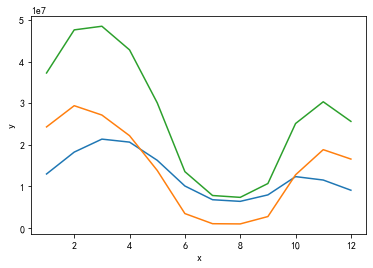

[37245000.0,
 47605000.0,
 48480000.0,
 42795000.0,
 30075000.0,
 13525538.14075,
 7787663.38724,
 7344049.94767,
 10673029.233550001,
 25095000.0,
 30320432.32855,
 25609952.469449997]

In [42]:
#4.2 再是月平均的相关性

Month=[1,2,3,4,5,6,7,8,9,10,11,12]
ea1_=N_H.loc[N_H['month'] == 1, 'EA'].sum()/(len(N_H.loc[N_H['month'] == 1, 'EA']))
ea2_=N_H.loc[N_H['month'] == 2, 'EA'].sum()/(len(N_H.loc[N_H['month'] == 2, 'EA']))
ea3_=N_H.loc[N_H['month'] == 3, 'EA'].sum()/(len(N_H.loc[N_H['month'] == 3, 'EA']))
ea4_=N_H.loc[N_H['month'] == 4, 'EA'].sum()/(len(N_H.loc[N_H['month'] == 4, 'EA']))
ea5_=N_H.loc[N_H['month'] == 5, 'EA'].sum()/(len(N_H.loc[N_H['month'] == 5, 'EA']))
ea6_=N_H.loc[N_H['month'] == 6, 'EA'].sum()/(len(N_H.loc[N_H['month'] == 6, 'EA']))
ea7_=N_H.loc[N_H['month'] == 7, 'EA'].sum()/(len(N_H.loc[N_H['month'] == 7, 'EA']))
ea8_=N_H.loc[N_H['month'] == 8, 'EA'].sum()/(len(N_H.loc[N_H['month'] == 8, 'EA']))
ea9_=N_H.loc[N_H['month'] == 9, 'EA'].sum()/(len(N_H.loc[N_H['month'] == 9, 'EA']))
ea10_=N_H.loc[N_H['month'] == 10, 'EA'].sum()/(len(N_H.loc[N_H['month'] == 10, 'EA']))
ea11_=N_H.loc[N_H['month'] == 11, 'EA'].sum()/(len(N_H.loc[N_H['month'] == 11, 'EA']))
ea12_=N_H.loc[N_H['month'] == 12, 'EA'].sum()/(len(N_H.loc[N_H['month'] == 12, 'EA']))
print('ea1_',ea1_)


na1_=N_H.loc[N_H['month'] == 1, 'NA'].sum()/(len(N_H.loc[N_H['month'] == 1, 'NA']))
na2_=N_H.loc[N_H['month'] == 2, 'NA'].sum()/(len(N_H.loc[N_H['month'] == 2, 'NA']))
na3_=N_H.loc[N_H['month'] == 3, 'NA'].sum()/(len(N_H.loc[N_H['month'] == 3, 'NA']))
na4_=N_H.loc[N_H['month'] == 4, 'NA'].sum()/(len(N_H.loc[N_H['month'] == 4, 'NA']))
na5_=N_H.loc[N_H['month'] == 5, 'NA'].sum()/(len(N_H.loc[N_H['month'] == 5, 'NA']))
na6_=N_H.loc[N_H['month'] == 6, 'NA'].sum()/(len(N_H.loc[N_H['month'] == 6, 'NA']))
na7_=N_H.loc[N_H['month'] == 7, 'NA'].sum()/(len(N_H.loc[N_H['month'] == 7, 'NA']))
na8_=N_H.loc[N_H['month'] == 8, 'NA'].sum()/(len(N_H.loc[N_H['month'] == 8, 'NA']))
na9_=N_H.loc[N_H['month'] == 9, 'NA'].sum()/(len(N_H.loc[N_H['month'] == 9, 'NA']))
na10_=N_H.loc[N_H['month'] == 10, 'NA'].sum()/(len(N_H.loc[N_H['month'] == 10, 'NA']))
na11_=N_H.loc[N_H['month'] == 11, 'NA'].sum()/(len(N_H.loc[N_H['month'] == 11, 'NA']))
na12_=N_H.loc[N_H['month'] == 12, 'NA'].sum()/(len(N_H.loc[N_H['month'] == 12, 'NA']))
print('na1_',na1_)

nh1_=N_H.loc[N_H['month'] == 1, 'NH'].sum()/(len(N_H.loc[N_H['month'] == 1, 'NH']))
nh2_=N_H.loc[N_H['month'] == 2, 'NH'].sum()/(len(N_H.loc[N_H['month'] == 2, 'NH']))
nh3_=N_H.loc[N_H['month'] == 3, 'NH'].sum()/(len(N_H.loc[N_H['month'] == 3, 'NH']))
nh4_=N_H.loc[N_H['month'] == 4, 'NH'].sum()/(len(N_H.loc[N_H['month'] == 4, 'NH']))
nh5_=N_H.loc[N_H['month'] == 5, 'NH'].sum()/(len(N_H.loc[N_H['month'] == 5, 'NH']))
nh6_=N_H.loc[N_H['month'] == 6, 'NH'].sum()/(len(N_H.loc[N_H['month'] == 6, 'NH']))
nh7_=N_H.loc[N_H['month'] == 7, 'NH'].sum()/(len(N_H.loc[N_H['month'] == 7, 'NH']))
nh8_=N_H.loc[N_H['month'] == 8, 'NH'].sum()/(len(N_H.loc[N_H['month'] == 8, 'NH']))
nh9_=N_H.loc[N_H['month'] == 9, 'NH'].sum()/(len(N_H.loc[N_H['month'] == 9, 'NH']))
nh10_=N_H.loc[N_H['month'] == 10, 'NH'].sum()/(len(N_H.loc[N_H['month'] == 10, 'NH']))
nh11_=N_H.loc[N_H['month'] == 11, 'NH'].sum()/(len(N_H.loc[N_H['month'] == 11, 'NH']))
nh12_=N_H.loc[N_H['month'] == 12, 'NH'].sum()/(len(N_H.loc[N_H['month'] == 12, 'NH']))
print('nh1_',nh1_)



NA_=[
    na1_,
na2_,
na3_,
na4_,
na5_,
na6_,
na7_,
na8_,
na9_,
na10_,
na11_,
na12_
]
EA_=[
    ea1_,
ea2_,
ea3_,
ea4_,
ea5_,
ea6_,
ea7_,
ea8_,
ea9_,
ea10_,
ea11_,
ea12_
]

NH_=[
        nh1_,
nh2_,
nh3_,
nh4_,
nh5_,
nh6_,
nh7_,
nh8_,
nh9_,
nh10_,
nh11_,
nh12_
]

plt.plot(Month, NA_)
plt.plot(Month, EA_)
plt.plot(Month, NH_)
plt.title('')
plt.xlabel('x')
plt.ylabel('y')
 
plt.show()
NH_




In [43]:
corr=pd.DataFrame()
corr['EA']=EA_
corr['NA']=NA_
corr['NH']=NH_
corr
# 这里是做平均之后的数据了

,EA,NA,NH
0,2.428000e+07,1.296500e+07,3.724500e+07
1,2.938000e+07,1.822500e+07,4.760500e+07
2,2.713500e+07,2.134500e+07,4.848000e+07
3,2.217000e+07,2.062500e+07,4.279500e+07
4,1.382000e+07,1.625500e+07,3.007500e+07
5,3.448830e+06,1.007671e+07,1.352554e+07
6,1.011290e+06,6.776373e+06,7.787663e+06
7,9.607036e+05,6.383346e+06,7.344050e+06
8,2.732700e+06,7.940329e+06,1.067303e+07
9,1.276500e+07,1.233000e+07,2.509500e+07


In [44]:
corr.corr()
#这里是队三个地区的做月平均 再找的相关性  基本吻合逐月的相关性

,EA,NA,NH
EA,1.000000,0.822538,0.980157
NA,0.822538,1.000000,0.918947
NH,0.980157,0.918947,1.000000


EA->NH 0.980157
NA->NH 0.918947

In [45]:
# 4.3 再是年份做平均的

# 折线图与柱状图的结合
  
    #看看后面的SDD能做吗 肯定能做 且是距平
    

In [46]:
# 4.4 再试季节做平均的
#各个季节的相关性  但是这个季节的做好是做成那种折线图的贡献率的那种
dfs 

,year1,NA1,EA1,NH1,year2,NA2,EA2,NH2,year3,NA3,EA3,NH3,year4,NA4,EA4,NH4
0,2001,59100000,63000000,122100000,2001,2.548062e+07,6.431581e+06,3.191220e+07,2001.0,3.055980e+07,3.618080e+07,6.674061e+07,2000,4.244653e+07,70100000,1.125465e+08
1,2002,59600000,62400000,122000000,2002,2.347747e+07,5.105084e+06,2.858256e+07,2002.0,3.263628e+07,3.981642e+07,7.245270e+07,2001,3.854757e+07,69300000,1.078476e+08
2,2003,57000000,66900000,123900000,2003,2.336334e+07,5.494395e+06,2.885773e+07,2003.0,3.086929e+07,3.256969e+07,6.343898e+07,2002,3.814980e+07,75000000,1.131498e+08
3,2004,58700000,66000000,124700000,2004,2.385518e+07,6.454525e+06,3.030970e+07,2004.0,3.245107e+07,3.585385e+07,6.830492e+07,2003,4.150611e+07,69700000,1.112061e+08
4,2005,57000000,65500000,122500000,2005,2.297294e+07,5.392492e+06,2.836543e+07,2005.0,3.130437e+07,3.121215e+07,6.251652e+07,2004,3.948399e+07,73500000,1.129840e+08
5,2006,57700000,66300000,124000000,2006,2.266570e+07,5.326280e+06,2.799198e+07,2006.0,3.062364e+07,3.627591e+07,6.689955e+07,2005,3.867876e+07,72700000,1.113788e+08
6,2007,57700000,62900000,120600000,2007,2.345542e+07,5.662700e+06,2.911812e+07,2007.0,3.159998e+07,3.241034e+07,6.401032e+07,2006,3.985148e+07,66500000,1.063515e+08
7,2008,59500000,60600000,120100000,2008,2.268913e+07,6.366917e+06,2.905604e+07,2008.0,3.218615e+07,3.316537e+07,6.535152e+07,2007,4.200000e+07,70100000,1.121000e+08
8,2009,60300000,63200000,123500000,2009,2.443973e+07,5.659260e+06,3.009899e+07,2009.0,3.078678e+07,3.326349e+07,6.405027e+07,2008,4.125492e+07,69200000,1.104549e+08
9,2010,54600000,64500000,119100000,2010,2.251906e+07,5.664711e+06,2.818377e+07,2010.0,3.003591e+07,3.320966e+07,6.324557e+07,2009,4.277904e+07,73200000,1.159790e+08


In [47]:

corr1=pd.DataFrame()
corr1['EA']=dfs['EA1']
corr1['NA']=dfs['NA1']
corr1['NH']=dfs['NH1']
corr1
# 这里是做平均之后的数据了
print(corr1.corr())

corr2=pd.DataFrame()
corr2['EA']=dfs['EA2']
corr2['NA']=dfs['NA2']
corr2['NH']=dfs['NH2']
corr2
# 这里是做平均之后的数据了
print(corr2.corr())

corr3=pd.DataFrame()
corr3['EA']=dfs['EA3']
corr3['NA']=dfs['NA3']
corr3['NH']=dfs['NH3']
corr3
# 这里是做平均之后的数据了
print(corr3.corr())

corr4=pd.DataFrame()
corr4['EA']=dfs['EA4']
corr4['NA']=dfs['NA4']
corr4['NH']=dfs['NH4']
corr4
# 这里是做平均之后的数据了
print(corr4.corr())

#好像搞清楚了一个点 这种相关关系 就 得是一个最终的数值  不好画图  那种画图的是贡献率 是距平 
#春
#夏
#秋
#冬
#相关分析 夏季的NA与NH 相关性挺大的
#秋冬都是EA>NA  大幅领先

          EA        NA        NH
EA  1.000000 -0.191629  0.694231
NA -0.191629  1.000000  0.573378
NH  0.694231  0.573378  1.000000
          EA        NA        NH
EA  1.000000  0.248313  0.770078
NA  0.248313  1.000000  0.809189
NH  0.770078  0.809189  1.000000
          EA        NA        NH
EA  1.000000 -0.006566  0.867476
NA -0.006566  1.000000  0.491772
NH  0.867476  0.491772  1.000000
          EA        NA        NH
EA  1.000000 -0.010106  0.870164
NA -0.010106  1.000000  0.483943
NH  0.870164  0.483943  1.000000


结果发现不同季节差别挺大的

In [48]:
# 4.5 四个季节的趋势 以及分趋势

好像减去趋势值就是了 不过这样做的目的和意义是啥呢 去趋势的意义
去趋势了之后平均的意义在于什么。
去趋势了之后再平均就没啥意义了啊
如何找出贡献率呢
对下降的贡献量 对上升的贡献量  就是相关关系 就是贡献量 主要导致的原因  但是怎么来区分是上升下降呢  就是上升的时候谁贡献的多 下降的时候谁贡献的多


响应的贡献 有的按照月份的12个月
有的按照年份 拉的 搞不懂了 月份的就是平均 年份的就是原数据就是不按平均啊  这个无所谓了  反正都是EA 大
所以如何既能突出季节性的月份 又能突出贡献呢
z-score 的图不知道是啥Z-Score标准化是数据处理的一种常用方法。通过它能够将不同量级的数据转化为统一量度的Z-Score分值进行比较。
https://www.jianshu.com/p/26d198115908
考虑下SCA 的表现形式   这个考虑要按照季节的表现来了 因为不做季节的话 其他的表现形式 就不知道了啊
还有就是SCP  要按照地区来划分了 已经在做了   但是不确定运行不运行的出来  有可能时间尺度太大了 能运行出来
还有就是要做SCF 的十年一分  但还是要考虑一个积累变化 啥叫change rate  啥叫trend 啊  十年一分 是出来了 但是change rate没有啊 


还有什么叫做偏相关系数  到底是谁导致谁啊  这个也不知道 啊
至少偏相关系数的意思是这个意思


SCA  是有出入的  数值是有出入的   但是 趋势没有出入  SCF  SCD 是没有出入的 暂时
皮尔森相关系数只能从表面上反映两个变量相关的性质，往往不能真实地反映变量之间的线性相关程度，甚至会给人造成相关的假象，

偏相关系数
https://zhuanlan.zhihu.com/p/82295367  
这个暂时也没有做啊啊 啊

NA->NH 0.900996
EA->NH 0.977931

NA->NH 0.906390
EA->NH 0.979181


那就合理了  反正 都是EA 大的  那能不能具体算出哪个月最大呢  这个是SCA  涉及一个5倍的关系  我不会计算 啊   

贡献率（%）=某因素增加量/总增加量×100%

偏相关分析是求A 与B 的关系 然后排除与之相联系的C 的之后的所有

相关关系就是简单的corr

最新的   如果是按照年的来做的话  就是SCA 的年平均 一年一个值  最后要做归一化   其实我是很想做这个的  因为 可以忽略偏差造成的影响。
归一化  z-score?
目前就是按照每月 季度 每年的 三个维度吧   看看哪个效果好属于是
排除 季度的  保留每年的

全都是距平   做距平 然后贡献率 
构成距平的分量就是贡献量

但其实 平均（anomaly）和z-score并不一样  但是为什么这里写成一样呢  
重新回到前面的例子，假设：A班级的平均分是80，标准差是10，A考了90分；B班的平均分是400，标准差是100，B考了600分。

通过上面的公式，我们可以计算得出，A的Z-Score是1（（90-80）/10），B的Z-Socre是2（（600-400）/100）。因此B的成绩更为优异。
https://medium.com/swlh/anomaly-detection-with-z-score-pick-the-low-hanging-fruits-ccd5ccccaee9
服了  妈的 还没运行出来  不知道出了什么问题属于是
好像Z-score找的就是异常值啊   不管他是不是 我们肯定不是来找异常值的 我们是来找一个标准化的

安道理来说也是这个SCD  得按照纬度来分啊  可以说明纬度的特殊性质  至于SCA 按照纬度还是大陆呢 肯定是按照大陆好一些 啊  

SCA 在三个地区上 的在春夏秋冬的趋势  其实主要看的是冬季的趋势
然后得出一个结论 这个是非常不错的选择

spring  3 4 5 summer 6 7 8 autumn 9 10 11 winter 12 1 2

In [49]:
# regr = linear_model.LinearRegression()  
# # 拟合 
# regr.fit(S['year1'].values.reshape(-1, 1), S['NA1']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# # 不难得到直线的斜率、截距 
# a, b = regr.coef_, regr.intercept_ 
# print(a)
# # print(b)
# plt.scatter(S['year1'], S['NA1'], color='blue')  
# # 2.拟合的直线 
# plt.plot(S['year1'], regr.predict(S['year1'].values.reshape(-1,1)), color='red', linewidth=4) 


# regr.fit(S['year1'].values.reshape(-1, 1), S['EA1']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# # 不难得到直线的斜率、截距 
# a, b = regr.coef_, regr.intercept_ 
# print(a)
# # print(b)
# plt.scatter(S['year1'], S['EA1'], color='blue')  
# # 2.拟合的直线 
# plt.plot(S['year1'], regr.predict(S['year1'].values.reshape(-1,1)), color='yellow', linewidth=4) 


# regr.fit(S['year1'].values.reshape(-1, 1), S['NH1']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# # 不难得到直线的斜率、截距 
# a, b = regr.coef_, regr.intercept_ 
# print(a)
# # print(b)
# plt.scatter(S['year1'], S['NH1'], color='blue')  
# # 2.拟合的直线 
# plt.plot(S['year1'], regr.predict(S['year1'].values.reshape(-1,1)), color='green', linewidth=4) 


# plt.show()

In [50]:
# regr = linear_model.LinearRegression()  
# # 拟合 
# regr.fit(S['year2'].values.reshape(-1, 1), S['NA2']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# # 不难得到直线的斜率、截距 
# a, b = regr.coef_, regr.intercept_ 
# print(a)
# # print(b)
# plt.scatter(S['year2'], S['NA2'], color='blue')  
# # 2.拟合的直线 
# plt.plot(S['year2'], regr.predict(S['year2'].values.reshape(-1,1)), color='red', linewidth=4) 


# regr.fit(S['year2'].values.reshape(-1, 1), S['EA2']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# # 不难得到直线的斜率、截距 
# a, b = regr.coef_, regr.intercept_ 
# print(a)
# # print(b)
# plt.scatter(S['year2'], S['EA2'], color='blue')  
# # 2.拟合的直线 
# plt.plot(S['year2'], regr.predict(S['year2'].values.reshape(-1,1)), color='yellow', linewidth=4) 


# regr.fit(S['year2'].values.reshape(-1, 1), S['NH2']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# # 不难得到直线的斜率、截距 
# a, b = regr.coef_, regr.intercept_ 
# print(a)
# # print(b)
# plt.scatter(S['year2'], S['NH2'], color='blue')  
# # 2.拟合的直线 
# plt.plot(S['year2'], regr.predict(S['year2'].values.reshape(-1,1)), color='green', linewidth=4) 


# plt.show()

In [51]:
# regr = linear_model.LinearRegression()  
# # 拟合 
# regr.fit(S['year4'].values.reshape(-1, 1), S['NA4']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# # 不难得到直线的斜率、截距 
# a, b = regr.coef_, regr.intercept_ 
# print(a)
# # print(b)
# plt.scatter(S['year4'], S['NA4'], color='blue')  
# # 2.拟合的直线 
# plt.plot(S['year4'], regr.predict(S['year4'].values.reshape(-1,1)), color='red', linewidth=4) 


# regr.fit(S['year4'].values.reshape(-1, 1), S['EA4']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# # 不难得到直线的斜率、截距 
# a, b = regr.coef_, regr.intercept_ 
# print(a)
# # print(b)
# plt.scatter(S['year4'], S['EA4'], color='blue')  
# # 2.拟合的直线 
# plt.plot(S['year4'], regr.predict(S['year4'].values.reshape(-1,1)), color='yellow', linewidth=4) 


# regr.fit(S['year4'].values.reshape(-1, 1), S['NH4']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# # 不难得到直线的斜率、截距 
# a, b = regr.coef_, regr.intercept_ 
# print(a)
# # print(b)
# plt.scatter(S['year4'], S['NH4'], color='blue')  
# # 2.拟合的直线 
# plt.plot(S['year4'], regr.predict(S['year4'].values.reshape(-1,1)), color='green', linewidth=4) 


# plt.show()

In [52]:
# S.drop(index=[19],inplace = True)
# S

In [53]:


# regr = linear_model.LinearRegression()  
# # 拟合 
# regr.fit(S['year3'].values.reshape(-1, 1), S['NA3']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# # 不难得到直线的斜率、截距 
# a, b = regr.coef_, regr.intercept_ 
# print(a)
# # print(b)
# plt.scatter(S['year3'], S['NA3'], color='blue')  
# # 2.拟合的直线 
# plt.plot(S['year3'], regr.predict(S['year3'].values.reshape(-1,1)), color='red', linewidth=4) 


# regr.fit(S['year3'].values.reshape(-1, 1), S['EA3']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# # 不难得到直线的斜率、截距 
# a, b = regr.coef_, regr.intercept_ 
# print(a)
# # print(b)
# plt.scatter(S['year3'], S['EA3'], color='blue')  
# # 2.拟合的直线 
# plt.plot(S['year3'], regr.predict(S['year3'].values.reshape(-1,1)), color='yellow', linewidth=4) 


# regr.fit(S['year3'].values.reshape(-1, 1), S['NH3']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# # 不难得到直线的斜率、截距 
# a, b = regr.coef_, regr.intercept_ 
# print(a)
# # print(b)
# plt.scatter(S['year3'], S['NH3'], color='blue')  
# # 2.拟合的直线 
# plt.plot(S['year3'], regr.predict(S['year3'].values.reshape(-1,1)), color='green', linewidth=4) 


# plt.show()

In [54]:
##### 55555 箱线图  

In [55]:
df

,month,date,NA,EA,NH,SCA_20_40,SCA_40_60,SCA_60_80,SCA_20_80,year
0,10,2000-10-01T00:00:00,1.340000e+07,1.250000e+07,2.590000e+07,3.586749e+05,4.099486e+06,2.100000e+07,2.545816e+07,2000
1,11,2000-11-01T00:00:00,1.270000e+07,2.000000e+07,3.270000e+07,8.283260e+05,1.420000e+07,1.790000e+07,3.292833e+07,2000
2,12,2000-12-01T00:00:00,9.846527e+06,1.700000e+07,2.684653e+07,1.564062e+06,2.040000e+07,4.949984e+06,2.691405e+07,2000
3,1,2001-01-01T00:00:00,1.370000e+07,2.390000e+07,3.760000e+07,2.171094e+06,2.200000e+07,1.370000e+07,3.787109e+07,2001
4,2,2001-02-01T00:00:00,1.890000e+07,2.920000e+07,4.810000e+07,1.608728e+06,2.180000e+07,2.510000e+07,4.850873e+07,2001
...,...,...,...,...,...,...,...,...,...,...
235,5,2020-05-01T00:00:00,1.720000e+07,1.290000e+07,3.010000e+07,6.616742e+05,4.229806e+06,2.400000e+07,2.889148e+07,2020
236,6,2020-06-01T00:00:00,9.982544e+06,2.115347e+06,1.209789e+07,3.234918e+05,7.435089e+05,9.874342e+06,1.094134e+07,2020
237,7,2020-07-01T00:00:00,6.540114e+06,9.108579e+05,7.450972e+06,1.796326e+05,3.173227e+05,5.934531e+06,6.431487e+06,2020
238,8,2020-08-01T00:00:00,6.258864e+06,8.844283e+05,7.143292e+06,1.255955e+05,3.201666e+05,5.664120e+06,6.109882e+06,2020


In [56]:
data=df
dd=pd.DataFrame()
data

,month,date,NA,EA,NH,SCA_20_40,SCA_40_60,SCA_60_80,SCA_20_80,year
0,10,2000-10-01T00:00:00,1.340000e+07,1.250000e+07,2.590000e+07,3.586749e+05,4.099486e+06,2.100000e+07,2.545816e+07,2000
1,11,2000-11-01T00:00:00,1.270000e+07,2.000000e+07,3.270000e+07,8.283260e+05,1.420000e+07,1.790000e+07,3.292833e+07,2000
2,12,2000-12-01T00:00:00,9.846527e+06,1.700000e+07,2.684653e+07,1.564062e+06,2.040000e+07,4.949984e+06,2.691405e+07,2000
3,1,2001-01-01T00:00:00,1.370000e+07,2.390000e+07,3.760000e+07,2.171094e+06,2.200000e+07,1.370000e+07,3.787109e+07,2001
4,2,2001-02-01T00:00:00,1.890000e+07,2.920000e+07,4.810000e+07,1.608728e+06,2.180000e+07,2.510000e+07,4.850873e+07,2001
...,...,...,...,...,...,...,...,...,...,...
235,5,2020-05-01T00:00:00,1.720000e+07,1.290000e+07,3.010000e+07,6.616742e+05,4.229806e+06,2.400000e+07,2.889148e+07,2020
236,6,2020-06-01T00:00:00,9.982544e+06,2.115347e+06,1.209789e+07,3.234918e+05,7.435089e+05,9.874342e+06,1.094134e+07,2020
237,7,2020-07-01T00:00:00,6.540114e+06,9.108579e+05,7.450972e+06,1.796326e+05,3.173227e+05,5.934531e+06,6.431487e+06,2020
238,8,2020-08-01T00:00:00,6.258864e+06,8.844283e+05,7.143292e+06,1.255955e+05,3.201666e+05,5.664120e+06,6.109882e+06,2020


In [57]:
dd['1']=data.loc[data['month'] == 1, 'NH'].reset_index(drop=True)
dd['2']=data.loc[data['month'] == 2, 'NH'].reset_index(drop=True)
dd['3']=data.loc[data['month'] == 3, 'NH'].reset_index(drop=True)
dd['4']=data.loc[data['month'] == 4, 'NH'].reset_index(drop=True)
dd['5']=data.loc[data['month'] == 5, 'NH'].reset_index(drop=True)
dd['6']=data.loc[data['month'] == 6, 'NH'].reset_index(drop=True)
dd['7']=data.loc[data['month'] == 7, 'NH'].reset_index(drop=True)
dd['8']=data.loc[data['month'] == 8, 'NH'].reset_index(drop=True)
dd['9']=data.loc[data['month'] == 9, 'NH'].reset_index(drop=True)
dd['10']=data.loc[data['month'] == 10, 'NH'].reset_index(drop=True)
dd['11']=data.loc[data['month'] == 11, 'NH'].reset_index(drop=True)
dd['12']=data.loc[data['month'] == 12, 'NH'].reset_index(drop=True)
dd
dd=dd.T

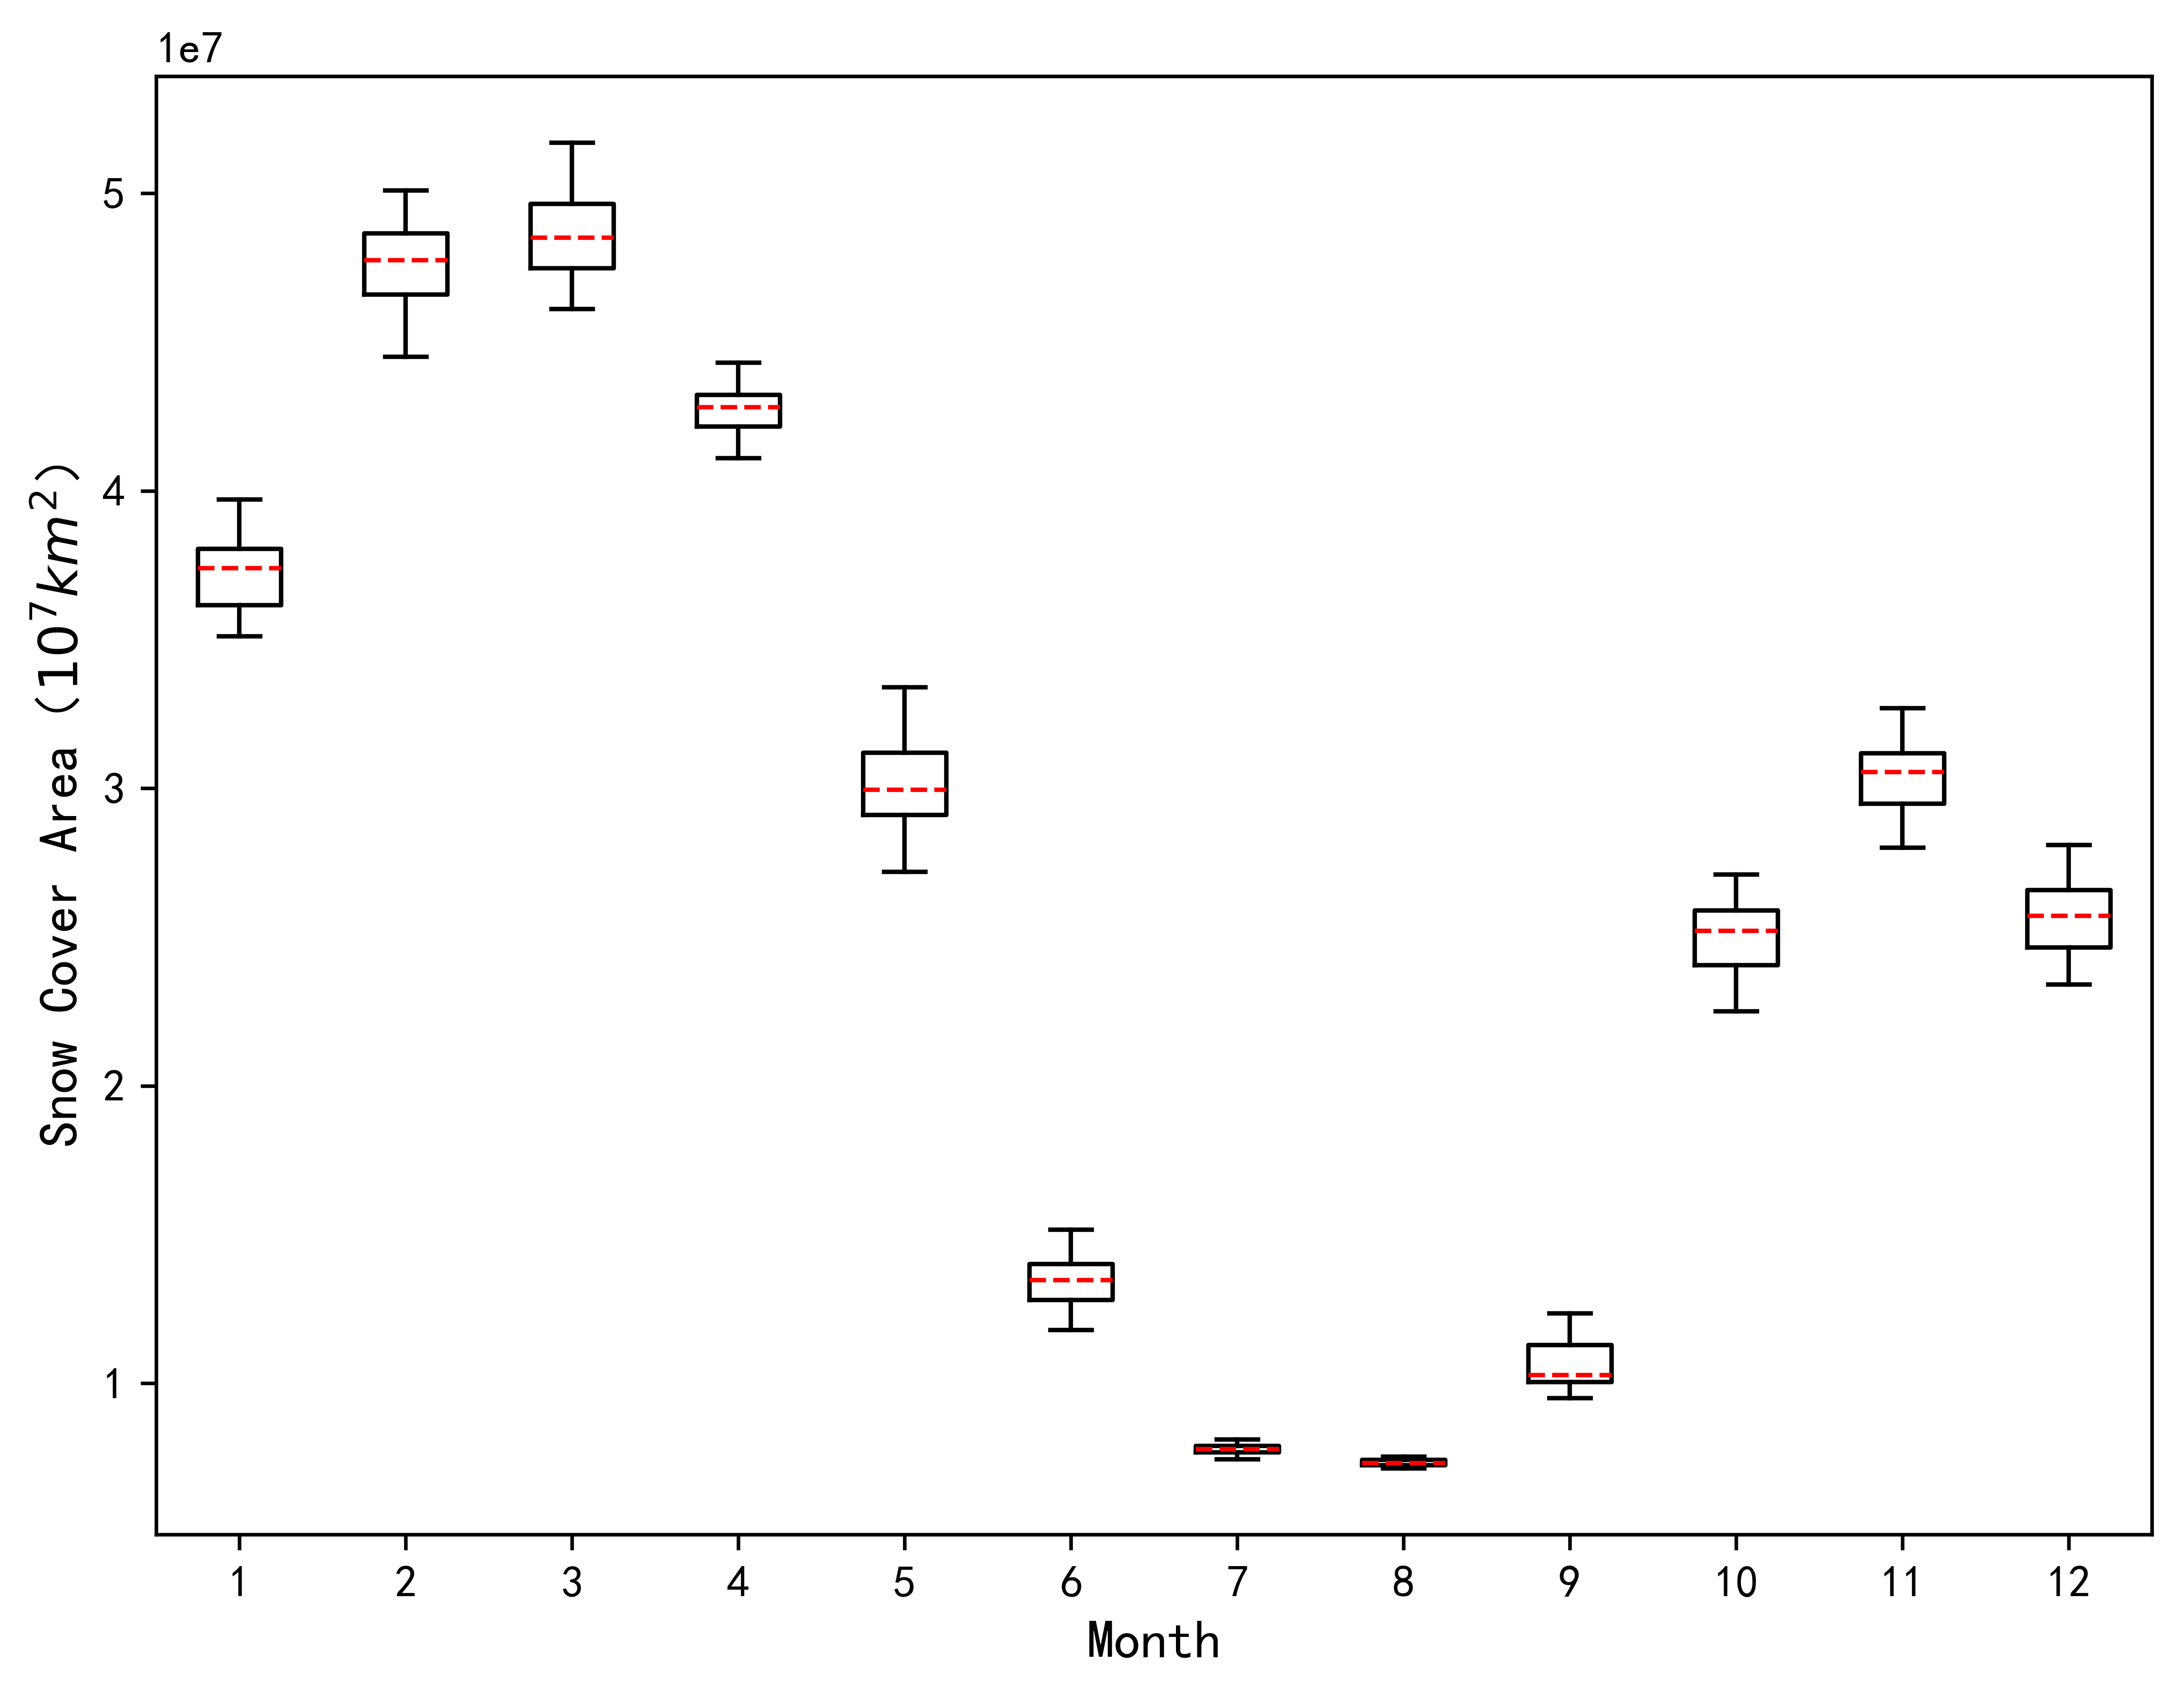

In [58]:
plt.figure(figsize=(8,6),dpi=600)
labels = 'Jay','JJ','Jolin','Hannah'#图例
# dd.boxplot(grid=False，showmeans) #也可用plot.box()

plt.boxplot(dd
           ,showfliers=False
#             ,showmeans=True

#             ,meanprops = {'marker':'.','color':'black'} # 设置均值点的属性，点的形状、填充色
            
             ,medianprops = {'linestyle':'--','color':'red'} # 设置中位数线的属性，线的类型和颜色
            
       
           )
# plt.title('dddd')
# r'$R^2=$'
# plt.tick_params(top='off', right='off')

# plt.ylabel('积雪面积（$10^7km^2$）',fontsize=12)
# plt.xlabel('月份',fontsize=12)
plt.ylabel('Snow Cover Area（$10^7km^2$）',fontsize=12)
plt.xlabel('Month',fontsize=12)
# plt.savefig("E:/book/海洋湖沼通报/boxplot.png",format='png',dpi=600)
plt.savefig("C:/Users/SZT/Desktop/论文/English first draft/figure/boxplot.png",format='png',dpi=600)
plt.show()

In [59]:
# ###########66666 热力图  和 距平图




# data.loc[data['month2'] == 1, 'data3']-=data.loc[data['month2'] == 1, 'data'].sum()/19
# data.loc[data['month2'] == 2, 'data3']-=data.loc[data['month2'] == 2, 'data'].sum()/19
# data.loc[data['month2'] == 3, 'data3']-=data.loc[data['month2'] == 3, 'data'].sum()/19
# data.loc[data['month2'] == 4, 'data3']-=data.loc[data['month2'] == 4, 'data'].sum()/19
# data.loc[data['month2'] == 5, 'data3']-=data.loc[data['month2'] == 5, 'data'].sum()/19
# data.loc[data['month2'] == 6, 'data3']-=data.loc[data['month2'] == 6, 'data'].sum()/19
# data.loc[data['month2'] == 7, 'data3']-=data.loc[data['month2'] == 7, 'data'].sum()/19
# data.loc[data['month2'] == 8, 'data3']-=data.loc[data['month2'] == 8, 'data'].sum()/19
# data.loc[data['month2'] == 9, 'data3']-=data.loc[data['month2'] == 9, 'data'].sum()/19
# data.loc[data['month2'] == 10, 'data3']-=data.loc[data['month2'] == 10, 'data'].sum()/19
# data.loc[data['month2'] == 11, 'data3']-=data.loc[data['month2'] == 11, 'data'].sum()/19
# data.loc[data['month2'] == 12, 'data3']-=data.loc[data['month2'] == 12, 'data'].sum()/19
# data

df
df['NH2']=df['NH']
df

,month,date,NA,EA,NH,SCA_20_40,SCA_40_60,SCA_60_80,SCA_20_80,year,NH2
0,10,2000-10-01T00:00:00,1.340000e+07,1.250000e+07,2.590000e+07,3.586749e+05,4.099486e+06,2.100000e+07,2.545816e+07,2000,2.590000e+07
1,11,2000-11-01T00:00:00,1.270000e+07,2.000000e+07,3.270000e+07,8.283260e+05,1.420000e+07,1.790000e+07,3.292833e+07,2000,3.270000e+07
2,12,2000-12-01T00:00:00,9.846527e+06,1.700000e+07,2.684653e+07,1.564062e+06,2.040000e+07,4.949984e+06,2.691405e+07,2000,2.684653e+07
3,1,2001-01-01T00:00:00,1.370000e+07,2.390000e+07,3.760000e+07,2.171094e+06,2.200000e+07,1.370000e+07,3.787109e+07,2001,3.760000e+07
4,2,2001-02-01T00:00:00,1.890000e+07,2.920000e+07,4.810000e+07,1.608728e+06,2.180000e+07,2.510000e+07,4.850873e+07,2001,4.810000e+07
...,...,...,...,...,...,...,...,...,...,...,...
235,5,2020-05-01T00:00:00,1.720000e+07,1.290000e+07,3.010000e+07,6.616742e+05,4.229806e+06,2.400000e+07,2.889148e+07,2020,3.010000e+07
236,6,2020-06-01T00:00:00,9.982544e+06,2.115347e+06,1.209789e+07,3.234918e+05,7.435089e+05,9.874342e+06,1.094134e+07,2020,1.209789e+07
237,7,2020-07-01T00:00:00,6.540114e+06,9.108579e+05,7.450972e+06,1.796326e+05,3.173227e+05,5.934531e+06,6.431487e+06,2020,7.450972e+06
238,8,2020-08-01T00:00:00,6.258864e+06,8.844283e+05,7.143292e+06,1.255955e+05,3.201666e+05,5.664120e+06,6.109882e+06,2020,7.143292e+06


In [60]:
#  先求平均 再减去
df.loc[df['month'] == 1, 'NH2']-=df.loc[df['month'] == 1, 'NH'].sum()/20
df.loc[df['month'] == 2, 'NH2']-=df.loc[df['month'] == 2, 'NH'].sum()/20
df.loc[df['month'] == 3, 'NH2']-=df.loc[df['month'] == 3, 'NH'].sum()/20
df.loc[df['month'] == 4, 'NH2']-=df.loc[df['month'] == 4, 'NH'].sum()/20
df.loc[df['month'] == 5, 'NH2']-=df.loc[df['month'] == 5, 'NH'].sum()/20
df.loc[df['month'] == 6, 'NH2']-=df.loc[df['month'] == 6, 'NH'].sum()/20
df.loc[df['month'] == 7, 'NH2']-=df.loc[df['month'] == 7, 'NH'].sum()/20
df.loc[df['month'] == 8, 'NH2']-=df.loc[df['month'] == 8, 'NH'].sum()/20
df.loc[df['month'] == 9, 'NH2']-=df.loc[df['month'] == 9, 'NH'].sum()/20
df.loc[df['month'] == 10, 'NH2']-=df.loc[df['month'] == 10, 'NH'].sum()/20
df.loc[df['month'] == 11, 'NH2']-=df.loc[df['month'] == 11, 'NH'].sum()/20
df.loc[df['month'] == 12, 'NH2']-=df.loc[df['month'] == 12, 'NH'].sum()/20
df

,month,date,NA,EA,NH,SCA_20_40,SCA_40_60,SCA_60_80,SCA_20_80,year,NH2
0,10,2000-10-01T00:00:00,1.340000e+07,1.250000e+07,2.590000e+07,3.586749e+05,4.099486e+06,2.100000e+07,2.545816e+07,2000,8.050000e+05
1,11,2000-11-01T00:00:00,1.270000e+07,2.000000e+07,3.270000e+07,8.283260e+05,1.420000e+07,1.790000e+07,3.292833e+07,2000,2.379568e+06
2,12,2000-12-01T00:00:00,9.846527e+06,1.700000e+07,2.684653e+07,1.564062e+06,2.040000e+07,4.949984e+06,2.691405e+07,2000,1.236575e+06
3,1,2001-01-01T00:00:00,1.370000e+07,2.390000e+07,3.760000e+07,2.171094e+06,2.200000e+07,1.370000e+07,3.787109e+07,2001,3.550000e+05
4,2,2001-02-01T00:00:00,1.890000e+07,2.920000e+07,4.810000e+07,1.608728e+06,2.180000e+07,2.510000e+07,4.850873e+07,2001,4.950000e+05
...,...,...,...,...,...,...,...,...,...,...,...
235,5,2020-05-01T00:00:00,1.720000e+07,1.290000e+07,3.010000e+07,6.616742e+05,4.229806e+06,2.400000e+07,2.889148e+07,2020,2.500000e+04
236,6,2020-06-01T00:00:00,9.982544e+06,2.115347e+06,1.209789e+07,3.234918e+05,7.435089e+05,9.874342e+06,1.094134e+07,2020,-1.427647e+06
237,7,2020-07-01T00:00:00,6.540114e+06,9.108579e+05,7.450972e+06,1.796326e+05,3.173227e+05,5.934531e+06,6.431487e+06,2020,-3.366911e+05
238,8,2020-08-01T00:00:00,6.258864e+06,8.844283e+05,7.143292e+06,1.255955e+05,3.201666e+05,5.664120e+06,6.109882e+06,2020,-2.007575e+05


In [61]:
# 对df NH2  进行一个数字降维
df['NH2']/=1000000
df

,month,date,NA,EA,NH,SCA_20_40,SCA_40_60,SCA_60_80,SCA_20_80,year,NH2
0,10,2000-10-01T00:00:00,1.340000e+07,1.250000e+07,2.590000e+07,3.586749e+05,4.099486e+06,2.100000e+07,2.545816e+07,2000,0.805000
1,11,2000-11-01T00:00:00,1.270000e+07,2.000000e+07,3.270000e+07,8.283260e+05,1.420000e+07,1.790000e+07,3.292833e+07,2000,2.379568
2,12,2000-12-01T00:00:00,9.846527e+06,1.700000e+07,2.684653e+07,1.564062e+06,2.040000e+07,4.949984e+06,2.691405e+07,2000,1.236575
3,1,2001-01-01T00:00:00,1.370000e+07,2.390000e+07,3.760000e+07,2.171094e+06,2.200000e+07,1.370000e+07,3.787109e+07,2001,0.355000
4,2,2001-02-01T00:00:00,1.890000e+07,2.920000e+07,4.810000e+07,1.608728e+06,2.180000e+07,2.510000e+07,4.850873e+07,2001,0.495000
...,...,...,...,...,...,...,...,...,...,...,...
235,5,2020-05-01T00:00:00,1.720000e+07,1.290000e+07,3.010000e+07,6.616742e+05,4.229806e+06,2.400000e+07,2.889148e+07,2020,0.025000
236,6,2020-06-01T00:00:00,9.982544e+06,2.115347e+06,1.209789e+07,3.234918e+05,7.435089e+05,9.874342e+06,1.094134e+07,2020,-1.427647
237,7,2020-07-01T00:00:00,6.540114e+06,9.108579e+05,7.450972e+06,1.796326e+05,3.173227e+05,5.934531e+06,6.431487e+06,2020,-0.336691
238,8,2020-08-01T00:00:00,6.258864e+06,8.844283e+05,7.143292e+06,1.255955e+05,3.201666e+05,5.664120e+06,6.109882e+06,2020,-0.200757


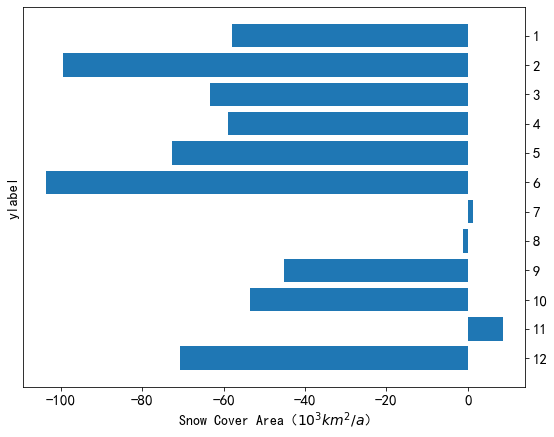

<Figure size 720x480 with 0 Axes>

In [62]:
fig, ax = plt.subplots(figsize=(9,7))

# ax.set_title('Title',fontsize=18)
# ax.set_xlabel('xlabel', fontsize=18,fontfamily = 'sans-serif',fontstyle='italic')
ax.set_ylabel('ylabel', fontsize='x-large',fontstyle='oblique')
# ax.legend()

month_rate = {    
    '12': -70.81982,
     '11':8.50556798722,
     '10': -53.458646616,
     '9': -45.07344224887,
     '8': -1.1875368818,
     '7': 1.17970273639,
     '6': -103.61334659474,
     '5': -72.55639097744,
     '4': -58.87218045113,
     '3': -63.30827067669,
     '2': -99.32330827068,
     '1': -57.96992481203
    }
group_data = list(month_rate.values())
group_names = list(month_rate.keys())
plt.barh(group_names, group_data)

# ax.set_xlabel('积雪面积（$10^3km^2/a$）',fontsize=14)
ax.set_xlabel('Snow Cover Area（$10^3km^2/a$）',fontsize=14)
ax.tick_params(labelsize=15)
ax.yaxis.tick_right()

# plt.savefig("./122.png")
plt.savefig("C:/Users/SZT/Desktop/论文/English first draft/figure/122.png")
plt.figure(dpi=120)
plt.show()
#  单位  10的3次方

In [63]:
dfp = df.pivot("month", "year", "NH2")

In [64]:
# # 有一个10 的三次方
# group_data = list(month_rate.values())
# group_names = list(month_rate.keys())
# # ax.yaxis.tick_right()


# plt.figure()
# plt.barh(group_names, group_data)
# # ax.yaxis.tick_right() 
# # plt.title('trend of NH snow cover area (10³ km²/yr)')
# # plt.title('北半球月积雪面积趋势')

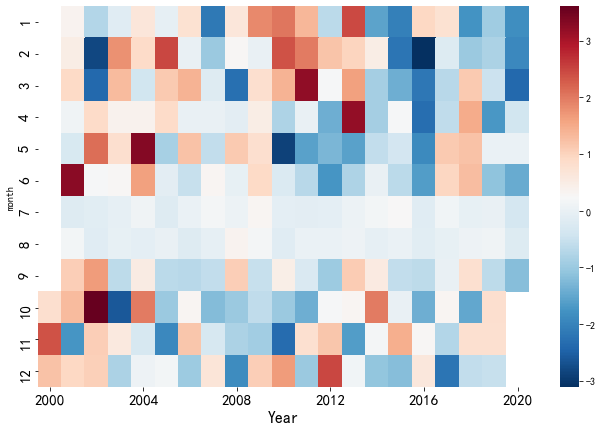

<Figure size 720x480 with 0 Axes>

In [65]:
fig, ax = plt.subplots(figsize=(11,7))  ###
# ax.yaxis.set_label_position("right")
#  
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

# plt.title('北半球积雪面积月距平')#标题

# cmap='RdBu_r' 颜色主题风格   xticklabels 代表步长  cmap='YlGnBu'    vmax=4,vmin=-4,
sns_plot = sns.heatmap(dfp,cmap='RdBu_r',ax=ax, xticklabels=4, yticklabels=1)

# tick_params 中 direction='in'表示刻度线位于内侧，另外还有参数 out,inout
sns_plot.tick_params(labelsize=15, direction='out')

# ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# plt.xlabel('年份',fontsize=16)
plt.xlabel('Year',fontsize=16)
# ax.yaxis.set_label_position("right")
# ax.set_ylabel('ylabel', fontsize='x-large',fontstyle='oblique')
# ax.yaxis.tick_right()

# plt.savefig("./133.png")
plt.savefig("C:/Users/SZT/Desktop/论文/English first draft/figure/133.png")

# plt.ylabel('积雪面积（$10^3km^2/a$）',fontsize=14)
# cax = plt.gcf().axes[-1]
# colorbar 中 top='off', bottom='off', left='off', right='off'表示上下左右侧的刻度线全部不显示
#sns_plot.tick_params(labelsize=20, direction='out', top='off', bottom='off', left='off', right='off')
plt.figure(dpi=120)

plt.show()


#  10的6次方 平方km
# 10 D的3次方

时间上的断点   因为 MK 找不出来 气死我了  
15 年 开始  负距平 增多 
以及看看原文中人家是怎么表述 这个热力图的

In [66]:
#  6  666  做做关于纬度的相关性

In [67]:
df

,month,date,NA,EA,NH,SCA_20_40,SCA_40_60,SCA_60_80,SCA_20_80,year,NH2
0,10,2000-10-01T00:00:00,1.340000e+07,1.250000e+07,2.590000e+07,3.586749e+05,4.099486e+06,2.100000e+07,2.545816e+07,2000,0.805000
1,11,2000-11-01T00:00:00,1.270000e+07,2.000000e+07,3.270000e+07,8.283260e+05,1.420000e+07,1.790000e+07,3.292833e+07,2000,2.379568
2,12,2000-12-01T00:00:00,9.846527e+06,1.700000e+07,2.684653e+07,1.564062e+06,2.040000e+07,4.949984e+06,2.691405e+07,2000,1.236575
3,1,2001-01-01T00:00:00,1.370000e+07,2.390000e+07,3.760000e+07,2.171094e+06,2.200000e+07,1.370000e+07,3.787109e+07,2001,0.355000
4,2,2001-02-01T00:00:00,1.890000e+07,2.920000e+07,4.810000e+07,1.608728e+06,2.180000e+07,2.510000e+07,4.850873e+07,2001,0.495000
...,...,...,...,...,...,...,...,...,...,...,...
235,5,2020-05-01T00:00:00,1.720000e+07,1.290000e+07,3.010000e+07,6.616742e+05,4.229806e+06,2.400000e+07,2.889148e+07,2020,0.025000
236,6,2020-06-01T00:00:00,9.982544e+06,2.115347e+06,1.209789e+07,3.234918e+05,7.435089e+05,9.874342e+06,1.094134e+07,2020,-1.427647
237,7,2020-07-01T00:00:00,6.540114e+06,9.108579e+05,7.450972e+06,1.796326e+05,3.173227e+05,5.934531e+06,6.431487e+06,2020,-0.336691
238,8,2020-08-01T00:00:00,6.258864e+06,8.844283e+05,7.143292e+06,1.255955e+05,3.201666e+05,5.664120e+06,6.109882e+06,2020,-0.200757


In [68]:
# regr = linear_model.LinearRegression()  
# # 拟合 
# regr.fit(dfs['year4'].values.reshape(-1, 1), dfs1['NH4']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# # 不难得到直线的斜率、截距 
# a, b = regr.coef_, regr.intercept_ 
# print(a)
# print(b)
# plt.scatter(dfs['year4'], dfs1['NH4'], color='blue')  
# # 2.拟合的直线 
# plt.plot(dfs['year4'], regr.predict(dfs['year4'].values.reshape(-1,1)), color='red', linewidth=4) 
# plt.show()

In [69]:
# 先求20-40  的这个阶段的斜率 
# 再求40-60  60-80  
# 关键是怎么求出单位纬度的  每上升10度
# 这个没什么意义  要是天数还有意义 你这个关键是每个纬度的陆地面积也不同啊  真是的

In [70]:
# data['data4']=data['data']
# data

In [71]:
# data['data4'].sum()/19

In [72]:
# y01=data.loc[data['year'] == 2001, 'data4'].sum()-data['data4'].sum()/19
# y02=data.loc[data['year'] == 2002, 'data4'].sum()-data['data4'].sum()/19
# y03=data.loc[data['year'] == 2003, 'data4'].sum()-data['data4'].sum()/19
# y04=data.loc[data['year'] == 2004, 'data4'].sum()-data['data4'].sum()/19
# y05=data.loc[data['year'] == 2005, 'data4'].sum()-data['data4'].sum()/19
# y06=data.loc[data['year'] == 2006, 'data4'].sum()-data['data4'].sum()/19
# y07=data.loc[data['year'] == 2007, 'data4'].sum()-data['data4'].sum()/19
# y08=data.loc[data['year'] == 2008, 'data4'].sum()-data['data4'].sum()/19
# y09=data.loc[data['year'] == 2009, 'data4'].sum()-data['data4'].sum()/19
# y10=data.loc[data['year'] == 2010, 'data4'].sum()-data['data4'].sum()/19
# y11=data.loc[data['year'] == 2011, 'data4'].sum()-data['data4'].sum()/19
# y12=data.loc[data['year'] == 2012, 'data4'].sum()-data['data4'].sum()/19
# y13=data.loc[data['year'] == 2013, 'data4'].sum()-data['data4'].sum()/19
# y14=data.loc[data['year'] == 2014, 'data4'].sum()-data['data4'].sum()/19
# y15=data.loc[data['year'] == 2015, 'data4'].sum()-data['data4'].sum()/19
# y16=data.loc[data['year'] == 2016, 'data4'].sum()-data['data4'].sum()/19
# y17=data.loc[data['year'] == 2007, 'data4'].sum()-data['data4'].sum()/19
# y18=data.loc[data['year'] == 2018, 'data4'].sum()-data['data4'].sum()/19
# y19=data.loc[data['year'] == 2019, 'data4'].sum()-data['data4'].sum()/19



In [73]:
# ydata = {    
#     '2001': y01,
#     '2002': y02,
#     '2003': y03,
#     '2004': y04,
#     '2005': y05,
#     '2006': y06,
#     '2007': y07,
#     '2008': y08,
#     '2009': y09,
#     '2010': y10,
#     '2011': y11,
#     '2012': y12,
#     '2013': y13,
#     '2014': y14,
#     '2015': y15,
#     '2016': y16,
#     '2017': y17,
#     '2018': y18,
#     '2019': y19
#     }
# group_data = list(ydata.values())
# group_names = list(ydata.keys())

# # Default Settings
# plt.figure(figsize=(12,8))
# plt.bar(group_names, group_data)
# plt.title('北半球积雪面积年距平')

TODO
贡献量 贡献率 

这个贡献是这样吗  就是总的是增长  有两个不同的因素的
和我们这个不同啊 我们的这个区域都不同 就是怎么看出小区域对于大区域的贡献呢



就是那种柱状图与折线图的结合那种
然后写 论文  不写是小狗
然后合理的修改与解释

利用sensslpoe  研究SCD 

联系起来两个模块 
以及 关于SCA的纬度分析

还有就是表现形式  
季节的  以及 贡献率

还要写按照季节的积雪面积的变化  比如 春季SCE十年减少了多少
